 <h1> Data Analysis for Class Project </h1>

<h3> Tasks </h3>
<h4> Subject-level Analysis </h4> 

- [x] Import data set
- [x] Add headers
- [x] Visualize data
- [x] Data slicing: White trials & Rainbow Trials, By Interval
- [x] Data calculations

<h5> Calculations </h5>

- [x] Trial type: White vs. Rainbow, 3 vs. 6 vs. 12
- [x] RT error: Interval versus RT
- [x] Color error (Rainbow only): color_end vs. color_select
- [x] Number code rating scale: Early=-1, Close=0, Late=1


<h4> Group-Level Analysis </h4>

- [x] Response graphs: proportion vs seconds for each interval in white or rainbow
- [x] Color error graphs
- [x] Perception graphs: actual vs perceived performance

In [1]:
#import individual subject file using pandas
import pandas
import numpy as np



#load file with no headers
df=pandas.read_csv('sub_02.csv', header=None)
print(df.head())

               0   1             2    3    4       5           6    7   \
0  trial_interval   6   trial_color  180   RT  3.9730   color_end  330   
1  trial_interval  12   trial_color  120   RT  5.6874   color_end  336   
2  trial_interval  12   trial_color   -1   RT  5.2828   color_end   -1   
3  trial_interval  12   trial_color  180   RT  4.7186   color_end  360   
4  trial_interval   3   trial_color   -1   RT  1.9555   color_end   -1   

                8         9       10  
0   selected_color  255.5376   Close  
1   selected_color  308.7829   Close  
2   selected_color   -1.0000   Close  
3   selected_color  344.5916   Early  
4   selected_color   -1.0000   Close  


In [2]:
#add headers to each column

df.columns = ['', 'trial_interval', '', 'trial_color', '', 'RT', '', 'color_end', '', 'color_selected', 'rating']

print(df.head())

                   trial_interval                trial_color           RT  \
0  trial_interval               6   trial_color          180   RT  3.9730   
1  trial_interval              12   trial_color          120   RT  5.6874   
2  trial_interval              12   trial_color           -1   RT  5.2828   
3  trial_interval              12   trial_color          180   RT  4.7186   
4  trial_interval               3   trial_color           -1   RT  1.9555   

               color_end                   color_selected  rating  
0   color_end        330   selected_color        255.5376   Close  
1   color_end        336   selected_color        308.7829   Close  
2   color_end         -1   selected_color         -1.0000   Close  
3   color_end        360   selected_color        344.5916   Early  
4   color_end         -1   selected_color         -1.0000   Close  


<h3> Data Slicing </h3>

In [3]:
df1 = df.iloc[:, [1, 3, 5, 7, 9, 10]].copy()
print(df1.head())

   trial_interval  trial_color      RT  color_end  color_selected  rating
0               6          180  3.9730        330        255.5376   Close
1              12          120  5.6874        336        308.7829   Close
2              12           -1  5.2828         -1         -1.0000   Close
3              12          180  4.7186        360        344.5916   Early
4               3           -1  1.9555         -1         -1.0000   Close


In [4]:
#change close to 1 and early/late ratings to -1

df1.loc[df1.rating==' Close', "rating"] =  1
df1.loc[df1.rating==' Early', "rating"] = -1
df1.loc[df1.rating==' Late',  "rating"] = -1

print(df1.head())

   trial_interval  trial_color      RT  color_end  color_selected rating
0               6          180  3.9730        330        255.5376      1
1              12          120  5.6874        336        308.7829      1
2              12           -1  5.2828         -1         -1.0000      1
3              12          180  4.7186        360        344.5916     -1
4               3           -1  1.9555         -1         -1.0000      1


In [5]:
#calculate color error
c = df1.loc[:, "color_selected"] - df1.loc[:, "color_end"]

c[c > 180] = c[c > 180] - 360
c[c <-180] = c[c <-180] + 360

df1.loc[:, "color_error"] = c
print(df1.head())

   trial_interval  trial_color      RT  color_end  color_selected rating  \
0               6          180  3.9730        330        255.5376      1   
1              12          120  5.6874        336        308.7829      1   
2              12           -1  5.2828         -1         -1.0000      1   
3              12          180  4.7186        360        344.5916     -1   
4               3           -1  1.9555         -1         -1.0000      1   

   color_error  
0     -74.4624  
1     -27.2171  
2       0.0000  
3     -15.4084  
4       0.0000  


In [6]:
#calculate RT error

rt_error = df1.loc[:, "RT"] - df1.loc[:, "trial_interval"]
df1.loc[:, "rt_error"] = rt_error
print(df1.head())

   trial_interval  trial_color      RT  color_end  color_selected rating  \
0               6          180  3.9730        330        255.5376      1   
1              12          120  5.6874        336        308.7829      1   
2              12           -1  5.2828         -1         -1.0000      1   
3              12          180  4.7186        360        344.5916     -1   
4               3           -1  1.9555         -1         -1.0000      1   

   color_error  rt_error  
0     -74.4624   -2.0270  
1     -27.2171   -6.3126  
2       0.0000   -6.7172  
3     -15.4084   -7.2814  
4       0.0000   -1.0445  


In [7]:
#find 'actual_rating' for each trial
#participant was 'close' if RT was within half the trial interval away, 
#3: Close = 1.5-4.5;  else Early/Late
#6: Close = 3.0-9.0;  else Early/Late
#12:Close = 6.0-18.0; else Early/Late
#make close ratings 1, else -1

#find abs value of rt_error * 2
c = np.abs(df1.loc[:, 'rt_error']) * 2
df1.loc[:, 'rt_error_abs_x2'] = c


#close=1, early/late=-1
df1.loc[df1.loc[:, 'rt_error_abs_x2'] <= df1.loc[:, 'trial_interval'], 'actual_rating'] =  1
df1.loc[df1.loc[:, 'rt_error_abs_x2'] >  df1.loc[:, 'trial_interval'], 'actual_rating'] = -1

#calculate rating congruency (was the participants rating matching up with performance or not)
c = df1.loc[:, 'rating'] * df1.loc[:, 'actual_rating']
df1.loc[:, 'rating_congruency'] = c

print(df1.head())

   trial_interval  trial_color      RT  color_end  color_selected rating  \
0               6          180  3.9730        330        255.5376      1   
1              12          120  5.6874        336        308.7829      1   
2              12           -1  5.2828         -1         -1.0000      1   
3              12          180  4.7186        360        344.5916     -1   
4               3           -1  1.9555         -1         -1.0000      1   

   color_error  rt_error  rt_error_abs_x2  actual_rating rating_congruency  
0     -74.4624   -2.0270           4.0540            1.0                 1  
1     -27.2171   -6.3126          12.6252           -1.0                -1  
2       0.0000   -6.7172          13.4344           -1.0                -1  
3     -15.4084   -7.2814          14.5628           -1.0                 1  
4       0.0000   -1.0445           2.0890            1.0                 1  


<h3> Slice rows </h3>

**__Conditions__** 

*White Trials* <br>
**w3** : white trials, 3"  interval <br>
**w6** : white trials, 6"  interval <br>
**w12**: white trials, 12" interval <br>

*Rainbow Trials* <br>
**r3** : rainbow trials, 3"  interval <br>
**r6** : rainbow trials, 6"  interval <br>
**r12**: rainbow trials, 12" interval <br>
 

In [8]:
#slice rows by condition
df_w3 = df1.loc[(df1.loc[:, 'trial_color'] == -1) & (df1.loc[:, 'trial_interval'] == 3), :]
df_w6 = df1.loc[(df1.loc[:, 'trial_color'] == -1) & (df1.loc[:, 'trial_interval'] == 6), :]
df_w12= df1.loc[(df1.loc[:, 'trial_color'] == -1) & (df1.loc[:, 'trial_interval'] == 12),:]

df_r3 = df1.loc[(df1.loc[:, 'trial_color'] > -1) & (df1.loc[:, 'trial_interval'] == 3), :]
df_r6 = df1.loc[(df1.loc[:, 'trial_color'] > -1) & (df1.loc[:, 'trial_interval'] == 6), :]
df_r12= df1.loc[(df1.loc[:, 'trial_color'] > -1) & (df1.loc[:, 'trial_interval'] == 12),:]

print(df_w3.describe())
print(df_r6.describe())


       trial_interval  trial_color        RT  color_end  color_selected  \
count             4.0          4.0  4.000000        4.0             4.0   
mean              3.0         -1.0  1.988675       -1.0            -1.0   
std               0.0          0.0  0.068843        0.0             0.0   
min               3.0         -1.0  1.908000       -1.0            -1.0   
25%               3.0         -1.0  1.943625       -1.0            -1.0   
50%               3.0         -1.0  1.996550       -1.0            -1.0   
75%               3.0         -1.0  2.041600       -1.0            -1.0   
max               3.0         -1.0  2.053600       -1.0            -1.0   

       color_error  rt_error  rt_error_abs_x2  actual_rating  
count          4.0  4.000000         4.000000            4.0  
mean           0.0 -1.011325         2.022650            1.0  
std            0.0  0.068843         0.137685            0.0  
min            0.0 -1.092000         1.892800            1.0  
25%      

<h2> Visualization of Data </h2>

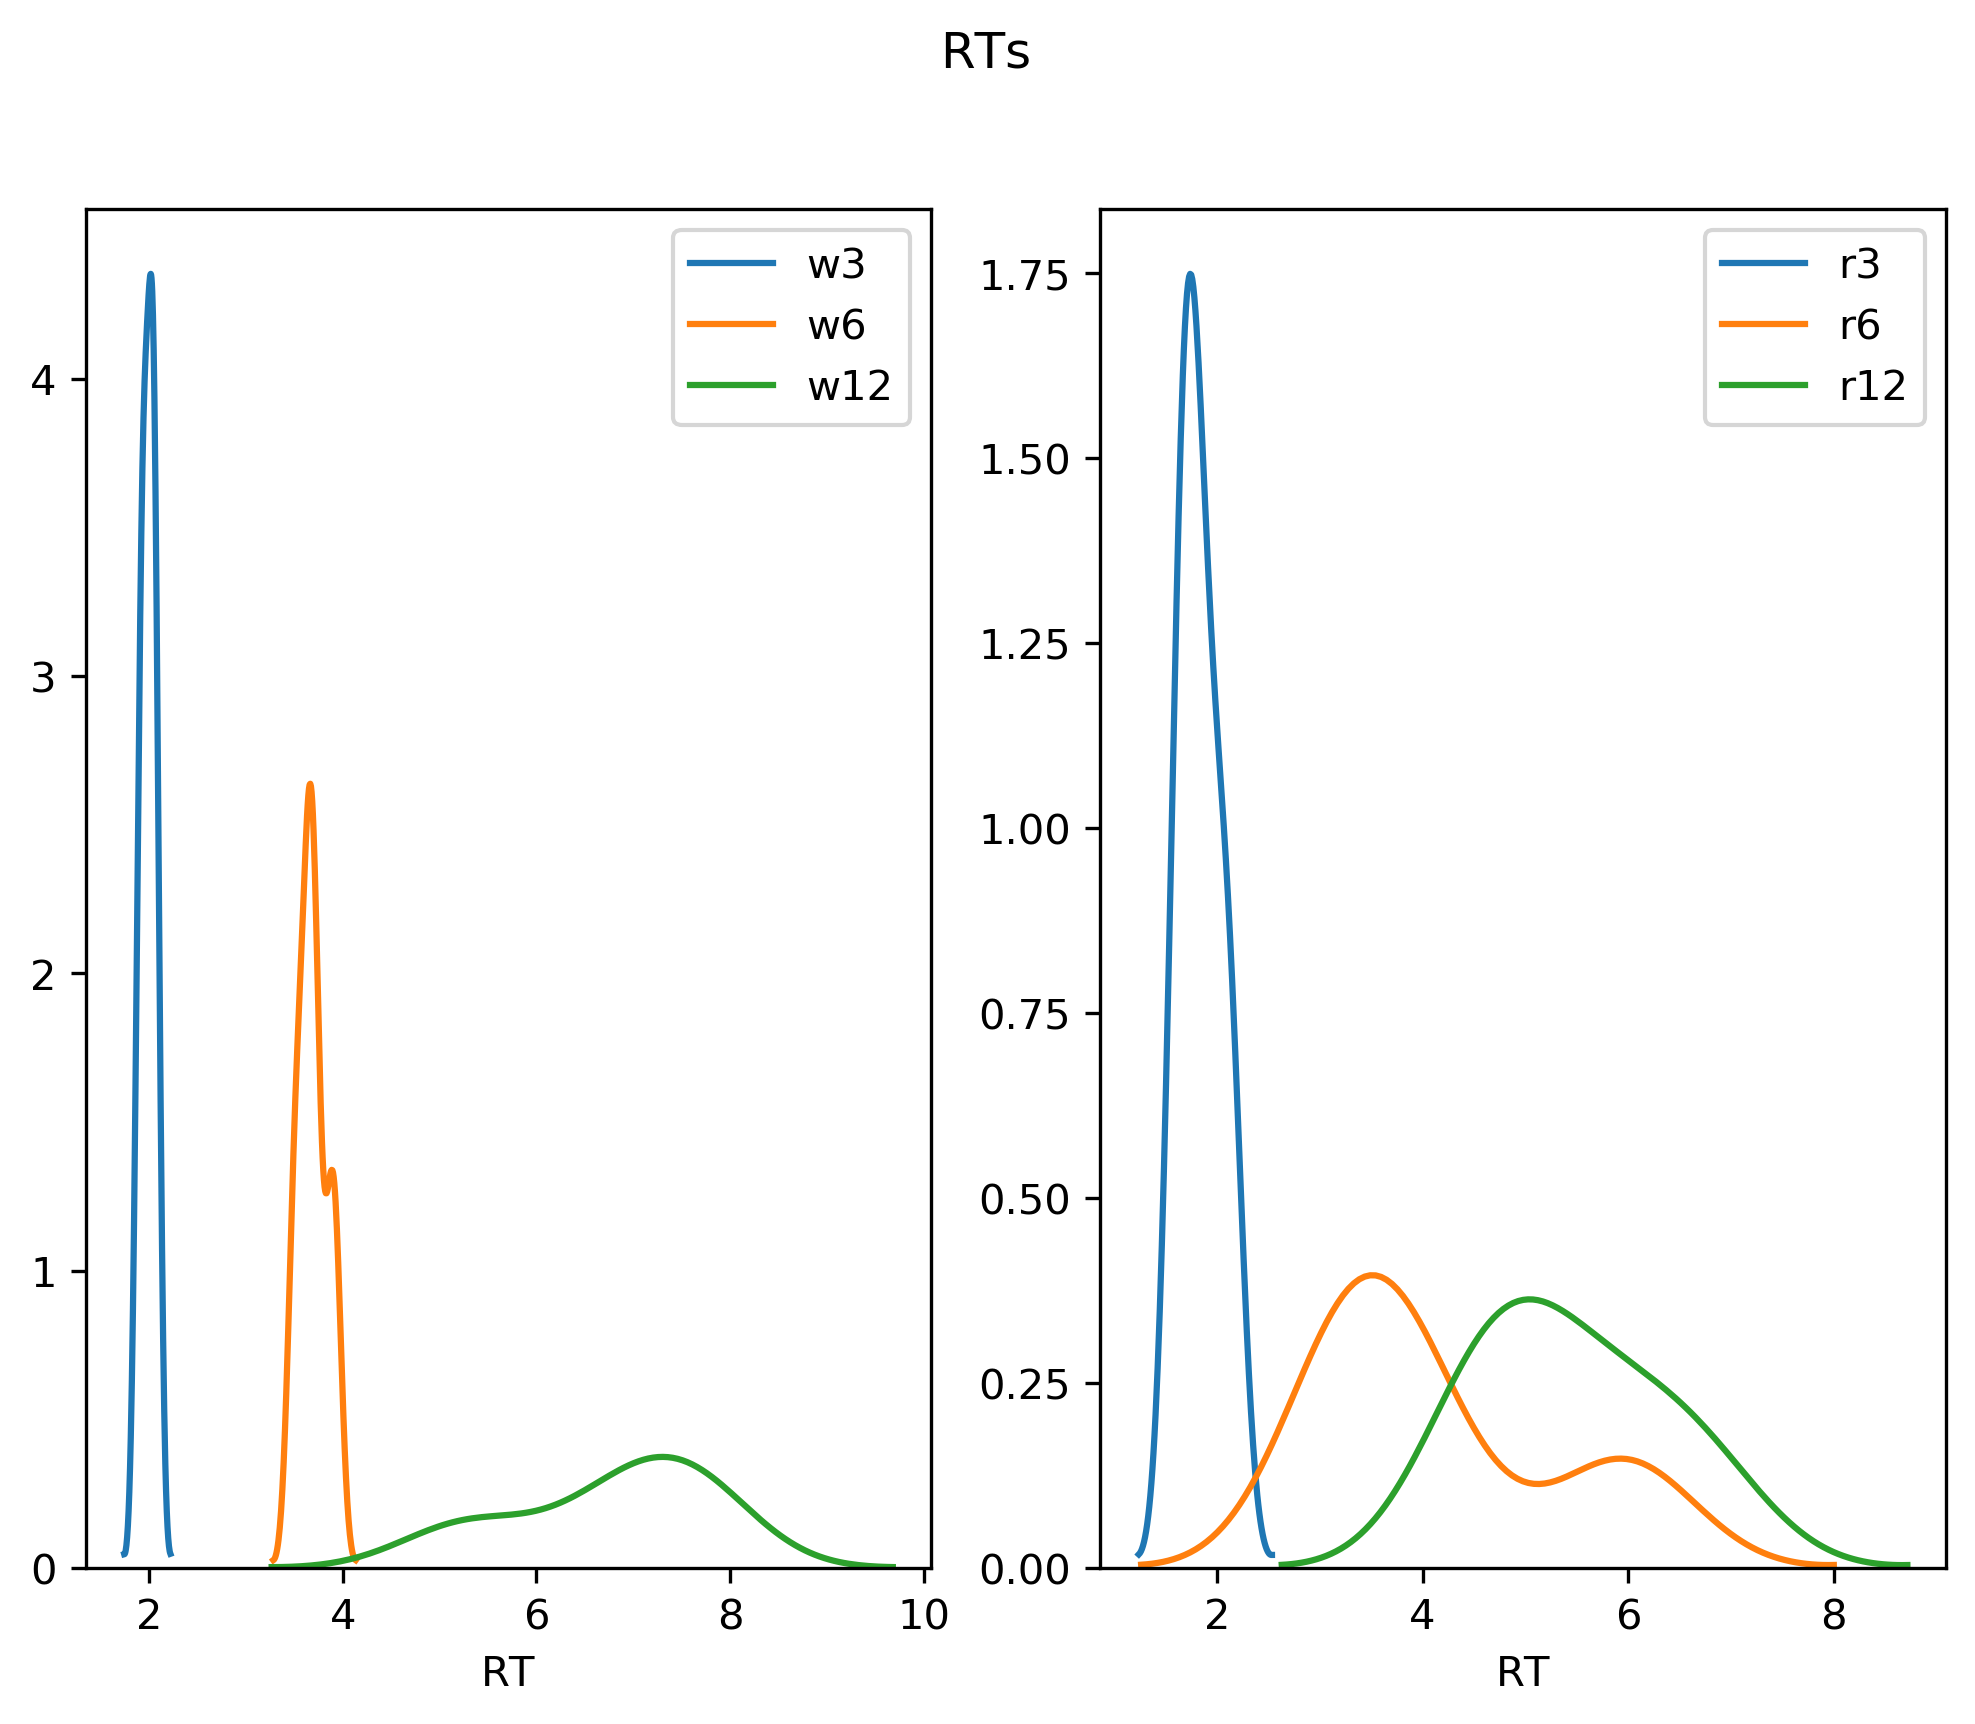

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axs = plt.subplots(ncols = 2, figsize =(8, 6), dpi = 300)
fig.suptitle('RTs')

#visualize interval timing responses 
#white trials
sns.distplot(df_w3.loc[:,  'RT'], hist=False, label='w3',  ax = axs[0])
sns.distplot(df_w6.loc[:,  'RT'], hist=False, label='w6',  ax = axs[0])
sns.distplot(df_w12.loc[:, 'RT'], hist=False, label='w12', ax = axs[0])

#rainbow trials
sns.distplot(df_r3.loc[:,  'RT'], hist=False, label='r3',  ax = axs[1])
sns.distplot(df_r6.loc[:,  'RT'], hist=False, label='r6',  ax = axs[1])
sns.distplot(df_r12.loc[:, 'RT'], hist=False, label='r12', ax = axs[1])

plt.legend()
plt.show()

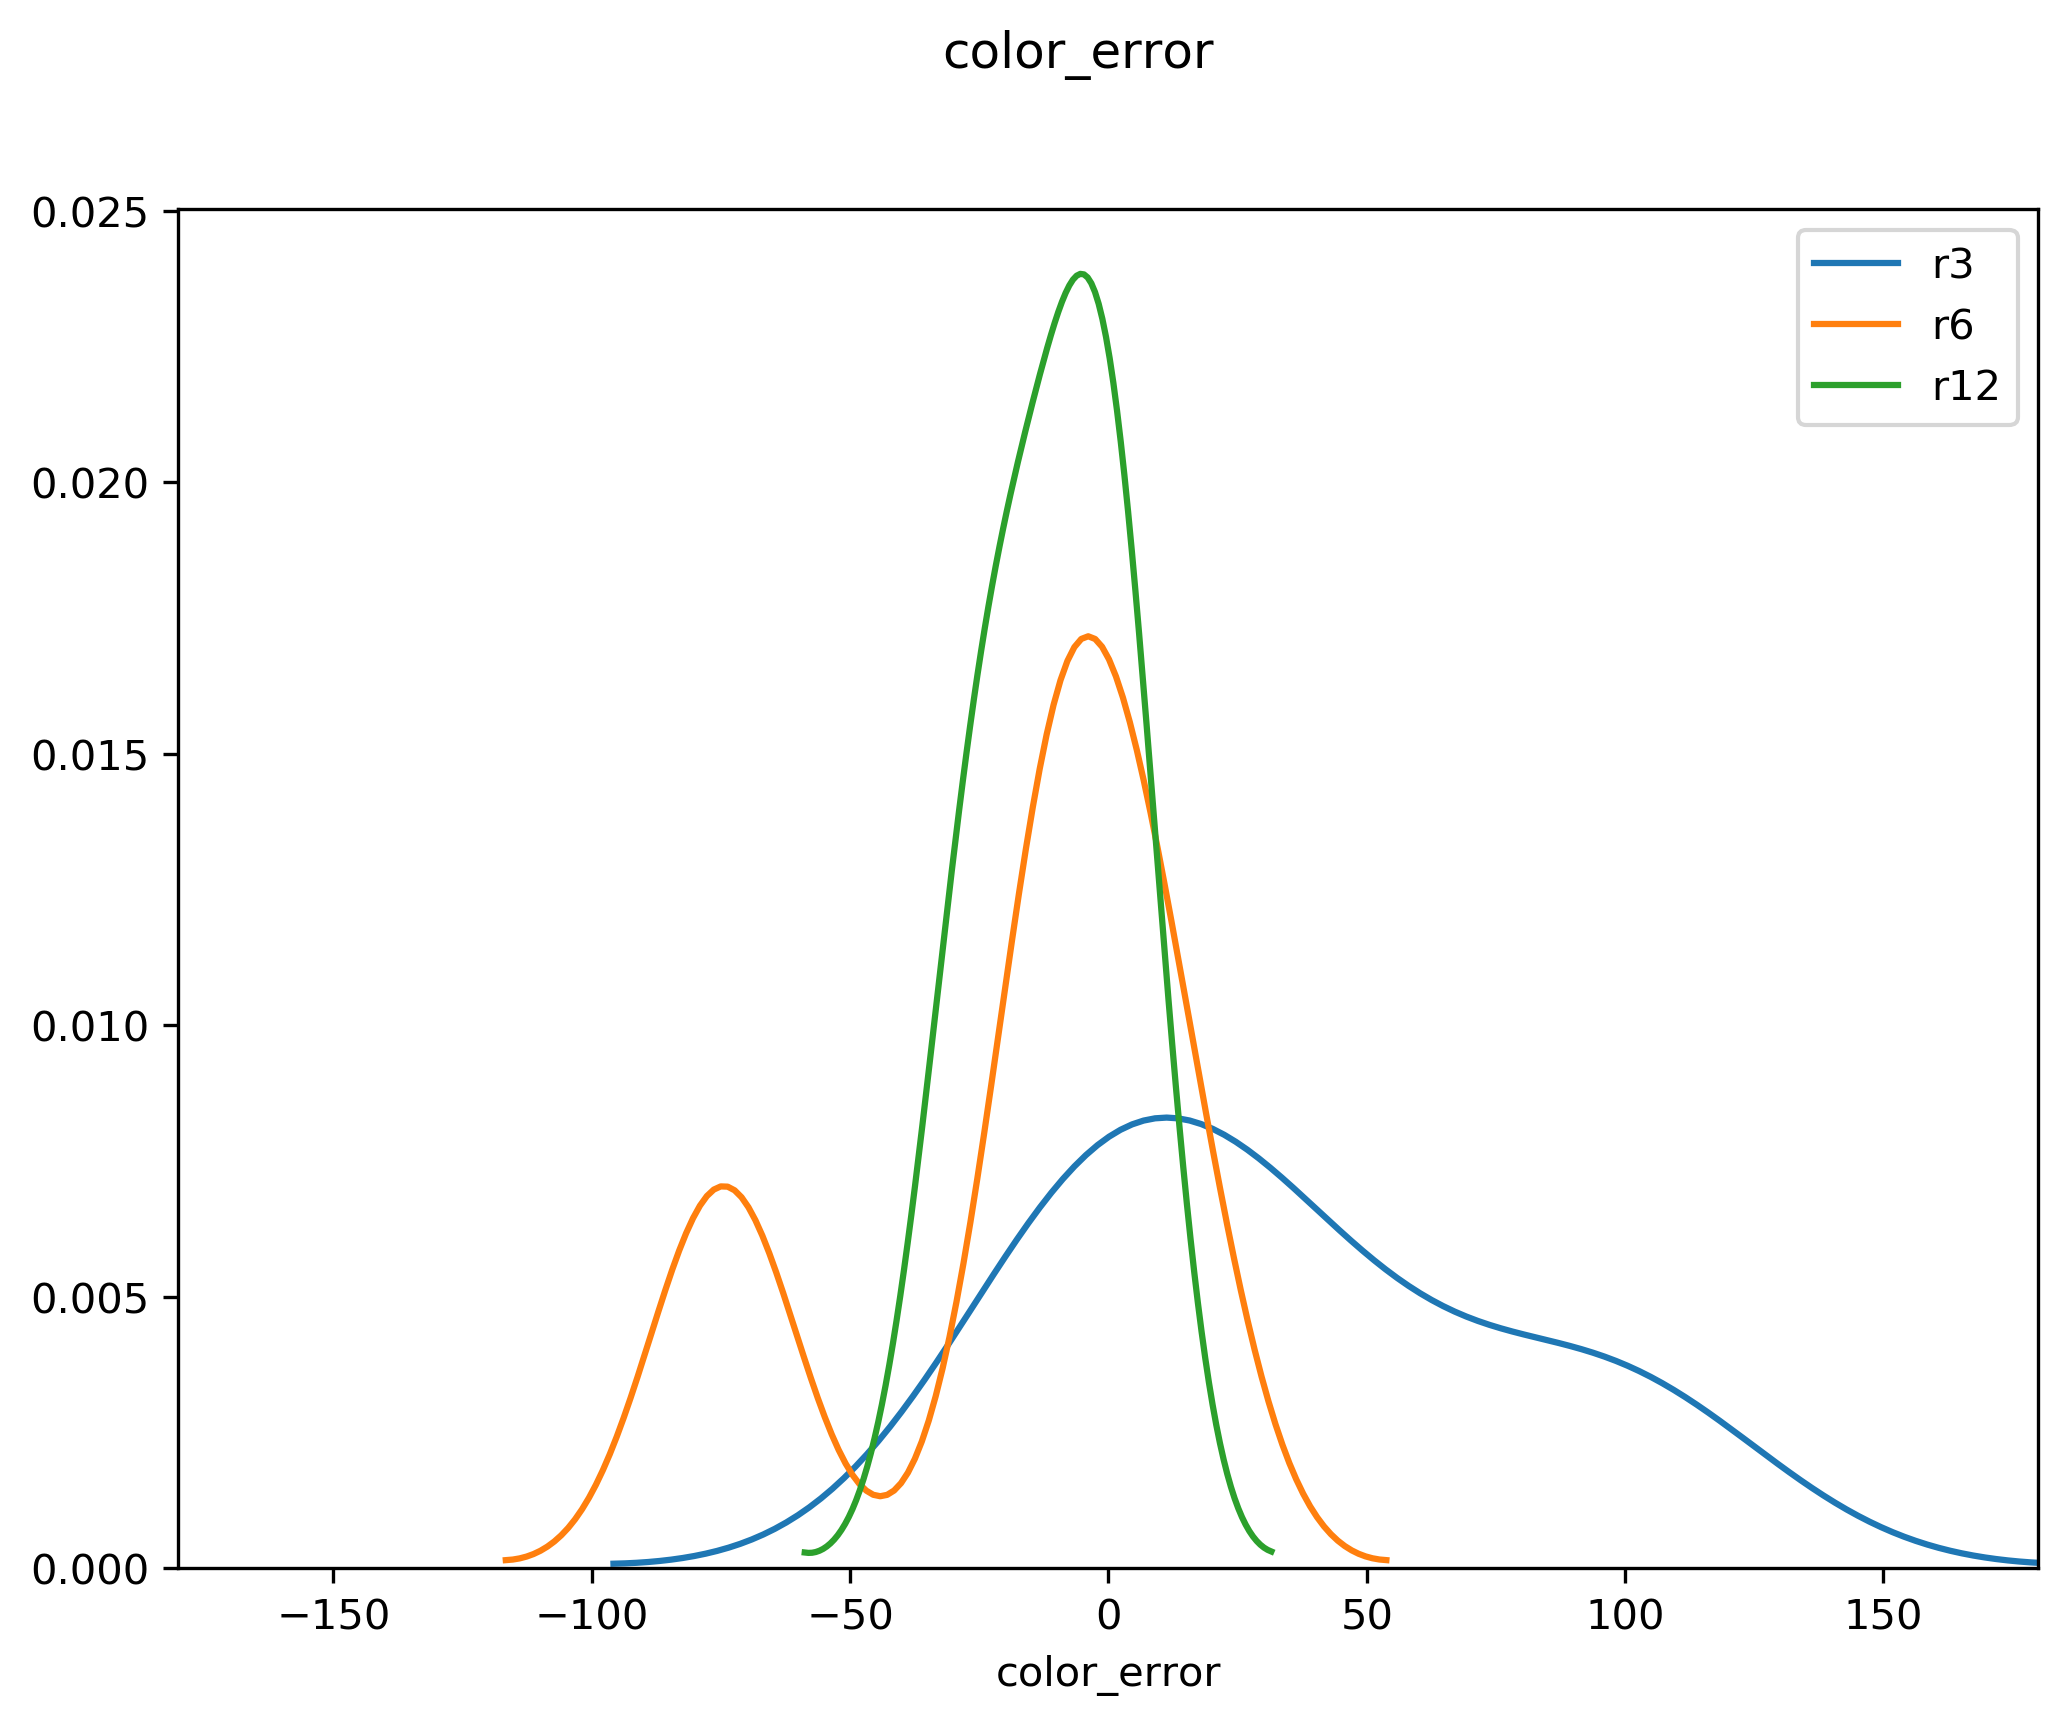

In [10]:
#visualize color error 

fig, axs = plt.subplots(ncols = 1, figsize =(8, 6), dpi = 300)
axs.set_xlim(-180, 180)
fig.suptitle('color_error')

sns.distplot(df_r3.loc[:,  'color_error'], hist = False, label = 'r3')
sns.distplot(df_r6.loc[:,  'color_error'], hist = False, label = 'r6')
sns.distplot(df_r12.loc[:, 'color_error'], hist = False, label = 'r12')

plt.legend()
plt.show()

In [11]:
#mean of absolute value of errors for each condition
import numpy as np

color_error_abs_mean = [np.mean(np.abs(df_w3.loc[:, "color_error"])), np.mean(np.abs(df_w6.loc[:, "color_error"])), np.mean(np.abs(df_w12.loc[:, "color_error"])), np.mean(np.abs(df_r3.loc[:, "color_error"])), np.mean(np.abs(df_r6.loc[:, "color_error"])), np.mean(np.abs(df_r12.loc[:, "color_error"]))]
rt_error_abs_mean = [np.mean(np.abs(df_w3.loc[:, "rt_error"])), np.mean(np.abs(df_w6.loc[:, "rt_error"])), np.mean(np.abs(df_w12.loc[:, "rt_error"])), np.mean(np.abs(df_r3.loc[:, "rt_error"])), np.mean(np.abs(df_r6.loc[:, "rt_error"])), np.mean(np.abs(df_r12.loc[:, "rt_error"]))]
print(color_error_abs_mean)
print(rt_error_abs_mean)

[0.0, 0.0, 0.0, 37.087075000000006, 25.757325, 10.757800000000003]
[1.0113250000000003, 2.308425, 5.232525, 1.162, 1.857475, 6.551075]


In [12]:
#std for each condition
color_error_std = [np.std(df_w3.loc[:, "color_error"]), np.std(df_w6.loc[:, "color_error"]), np.std(df_w12.loc[:, "color_error"]), np.std(df_r3.loc[:, "color_error"]), np.std(df_r6.loc[:, "color_error"]), np.std(df_r12.loc[:, "color_error"])]
rt_error_std = [np.std(df_w3.loc[:, "rt_error"]), np.std(df_w6.loc[:, "rt_error"]), np.std(df_w12.loc[:, "rt_error"]), np.std(df_r3.loc[:, "rt_error"]), np.std(df_r6.loc[:, "rt_error"]), np.std(df_r12.loc[:, "rt_error"])]
print(color_error_std)
print(rt_error_std)

[0.0, 0.0, 0.0, 40.09947085831527, 32.543178153982986, 11.351395450560249]
[0.05961951756765561, 0.13814668608041245, 0.9266530024097479, 0.17403515449471701, 1.0831724640494698, 0.7824657161019899]


In [13]:
import scipy.stats as stats

#independent t test
t, p = stats.ttest_ind(df_w3.loc[:, 'RT'], df_r3.loc[:, 'RT'])
print(t)
print(p)

1.4186301481881527
0.20579945084028475


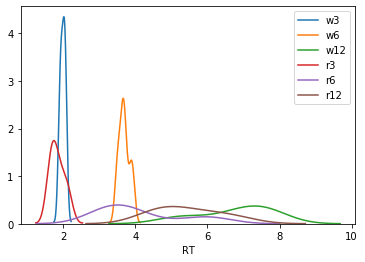

In [14]:
sns.distplot(df_w3.loc[:, 'RT'], label='w3', hist=False)
sns.distplot(df_w6.loc[:, 'RT'], label='w6', hist=False)
sns.distplot(df_w12.loc[:, 'RT'], label='w12', hist=False)
sns.distplot(df_r3.loc[:, 'RT'], label='r3', hist=False)
sns.distplot(df_r6.loc[:, 'RT'], label='r6', hist=False)
sns.distplot(df_r12.loc[:, 'RT'], label='r12', hist=False)
plt.legend()
plt.show()

<h3> Subject-level analysis function </h3>

In [15]:
def SubjectStats(fileName):
    
    #read from csv file
    df = pandas.read_csv(fileName, header = None)
    
    #give column names
    df.columns = ['', 'trial_interval', '', 'trial_color', '', 'RT', '', 'color_end', '', 'color_selected', 'rating']

    #change trial_color to -1 for 'white' and 1 for 'rainbow'
    df.loc[df.loc[:, 'trial_color'] > 0, 'trial_color'] = 1
    
    #calculate color error
    c = df.loc[:, 'color_selected'] - df.loc[:, 'color_end']
    c[c < -180] = c[c < -180] + 360
    c[c >  180] = c[c >  180] - 360
    df.loc[:, 'color_error'] = c
    
    #calculate RT error
    c = df.loc[:, 'RT'] - df.loc[:, 'trial_interval']
    df.loc[:, 'rt_error'] = c
    
    #Change close to 1 and early/late ratings -1
    df.loc[df.rating==' Close', "rating"] =  1
    df.loc[df.rating==' Early', "rating"] = -1
    df.loc[df.rating==' Late',  "rating"] = -1
    
    #Calculate rating 'accuracy'
    #find abs value of rt_error * 2
    c = np.abs(df.loc[:, 'rt_error']) * 2
    df.loc[:, 'rt_error_abs_x2'] = c


    #close=1, early/late=-1
    df.loc[df.loc[:, 'rt_error_abs_x2'] <= df.loc[:, 'trial_interval'], 'actual_rating'] =  1
    df.loc[df.loc[:, 'rt_error_abs_x2'] >  df.loc[:, 'trial_interval'], 'actual_rating'] = -1

    #calculate rating congruency (was the participants rating matching up with performance or not)
    c = df.loc[:, 'rating'] * df.loc[:, 'actual_rating']
    df.loc[:, 'rating_congruency'] = c
    
    #w3, w6, w12, r3, r6, r12
    c1_idx = [ -1,   -1,    -1,    1,    1,     1]
    c2_idx = [  3,    6,    12,    3,    6,    12]
    labels = ['w3', 'w6', 'w12', 'r3', 'r6', 'r12']
    
    #return values
    rt_mean = []
    rt_std  = []
    rt_error_mean = []
    rt_error_std  = []
    color_error_mean = []
    color_error_std  = [] 
    rating_congruency = []
    
    #generate 2 panels
    fig, axs = plt.subplots(ncols = 2, figsize = (15, 8.25))
    axs[1].set_xlim(-180, 180)
    fig.suptitle(fileName)
    
    for i in range (6):
        #slice rows
        df1 = df.loc[(df.loc[:, 'trial_color'] == c1_idx[i]) & (df.loc[:, 'trial_interval'] == c2_idx[i]), :]
        rt_mean.append(np.mean(df1.loc[:, 'RT']))
        rt_std.append(np.std(df1.loc[:, 'RT']))
        rt_error_mean.append(np.mean(df1.loc[:, 'rt_error']))
        rt_error_std.append(np.std(df1.loc[:, 'rt_error']))
        color_error_mean.append(np.mean(df1.loc[:, 'color_error']))
        color_error_std.append(np.std(df1.loc[:, 'color_error']))
        rating_congruency.append(np.mean(df1.loc[:, 'rating_congruency']))
        
        sns.distplot(df1.loc[:, 'RT'], label = labels[i], hist = False, ax = axs[0])
        sns.distplot(df1.loc[:, 'color_error'], label = labels[i], hist = False, ax = axs[1])
        
    plt.legend()
    plt.show()

    return rt_mean, rt_std, rt_error_mean, rt_error_std, color_error_mean, color_error_std, rating_congruency

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


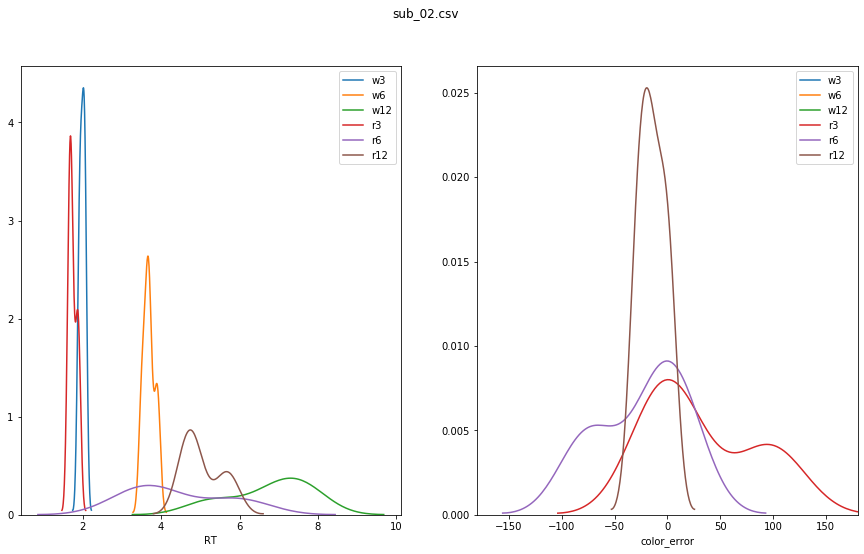

([1.9886749999999997,
  3.691575,
  6.767474999999999,
  1.7485666666666668,
  4.4229666666666665,
  5.056233333333334],
 [0.05961951756765561,
  0.13814668608041245,
  0.9266530024097479,
  0.09160255940141028,
  1.1179266533284828,
  0.4466652164155561],
 [-1.0113250000000003,
  -2.308425,
  -5.232525,
  -1.2514333333333332,
  -1.5770333333333335,
  -6.943766666666666],
 [0.05961951756765561,
  0.13814668608041245,
  0.9266530024097479,
  0.09160255940141028,
  1.1179266533284828,
  0.4466652164155561],
 [0.0, 0.0, 0.0, 32.594033333333336, -24.236433333333327, -14.2155],
 [0.0, 0.0, 0.0, 46.199065714675335, 36.583766626773446, 11.134757043001281],
 [1.0, 1.0, 0.5, 1.0, 1.0, -0.3333333333333333])

In [16]:
SubjectStats('sub_02.csv')

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


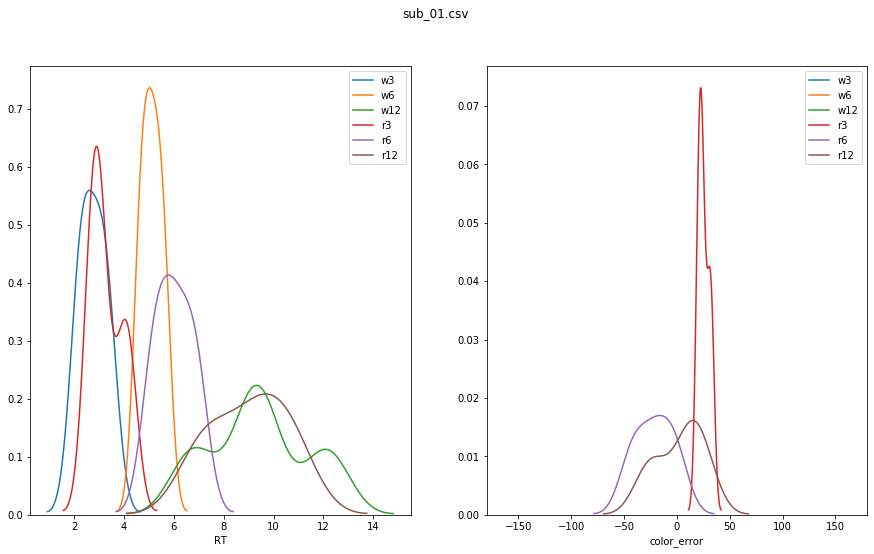

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


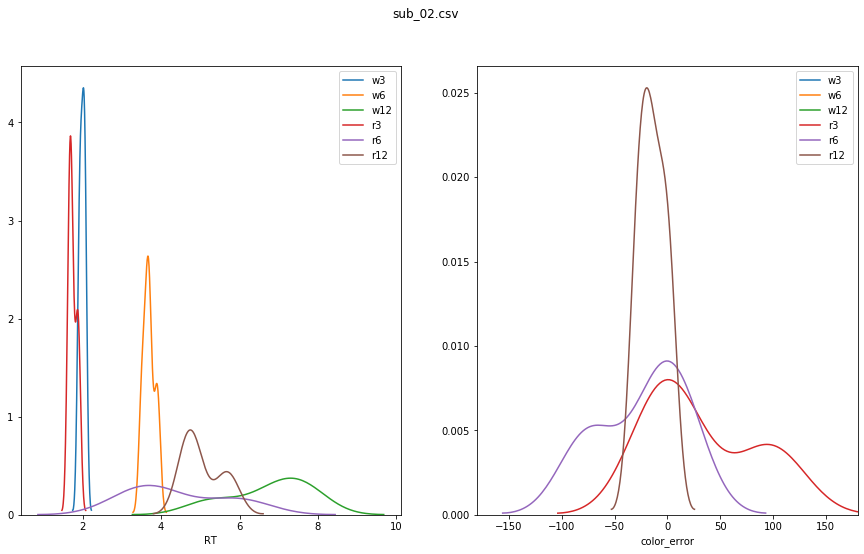

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


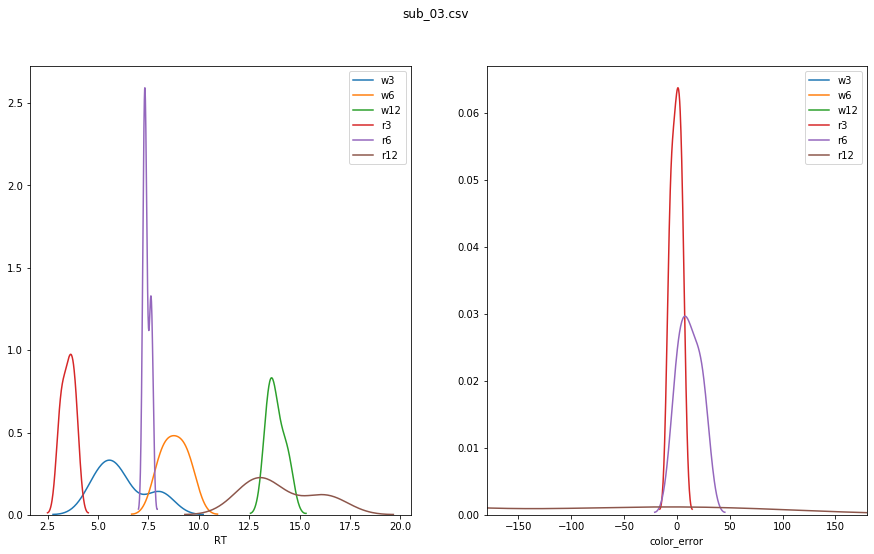

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


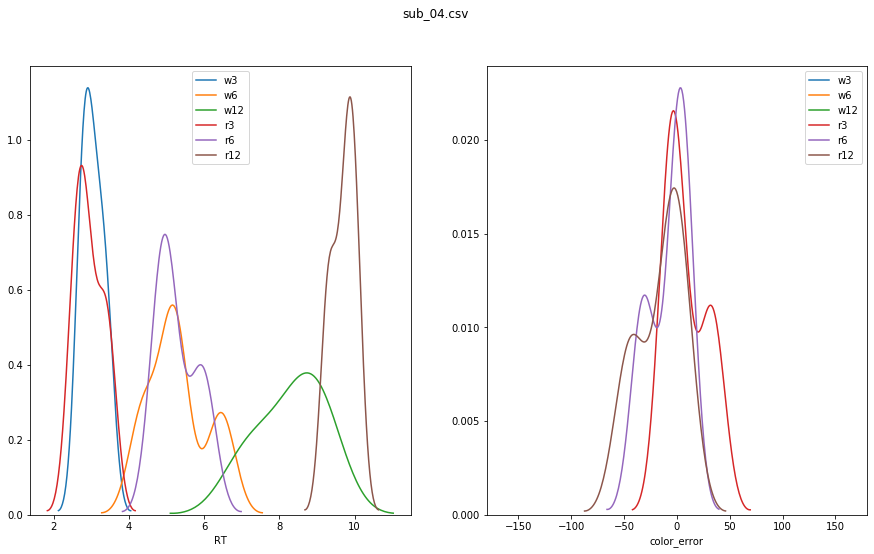

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


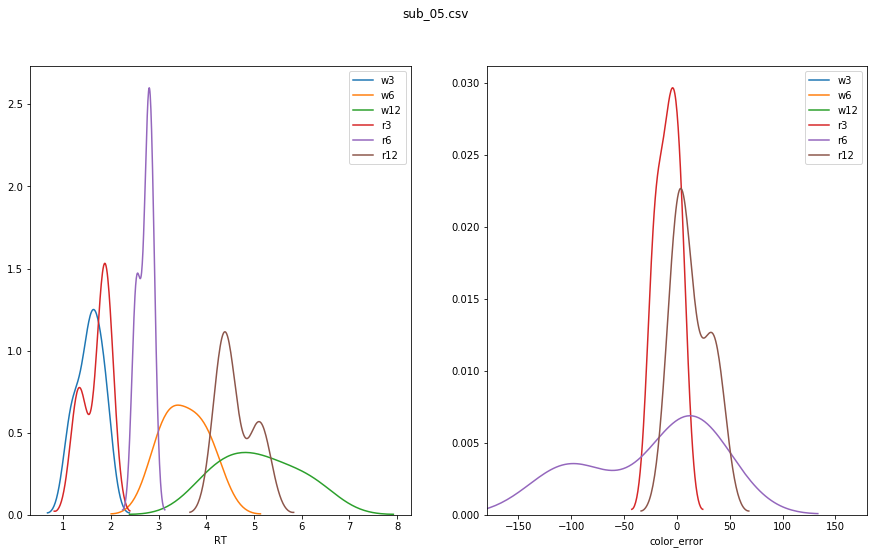

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


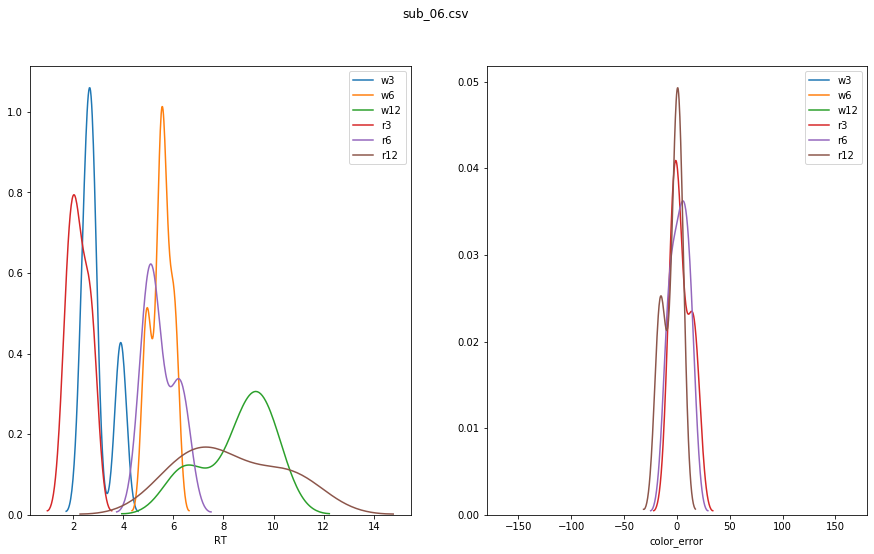

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


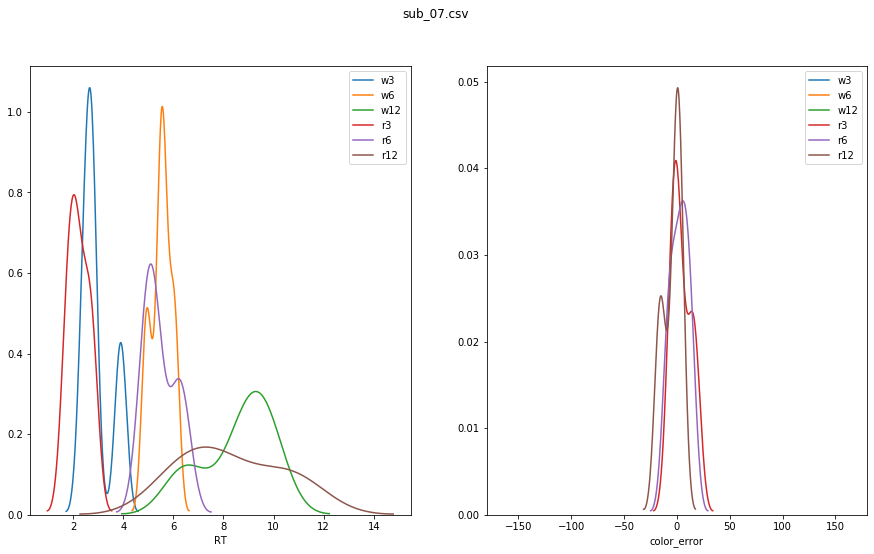

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


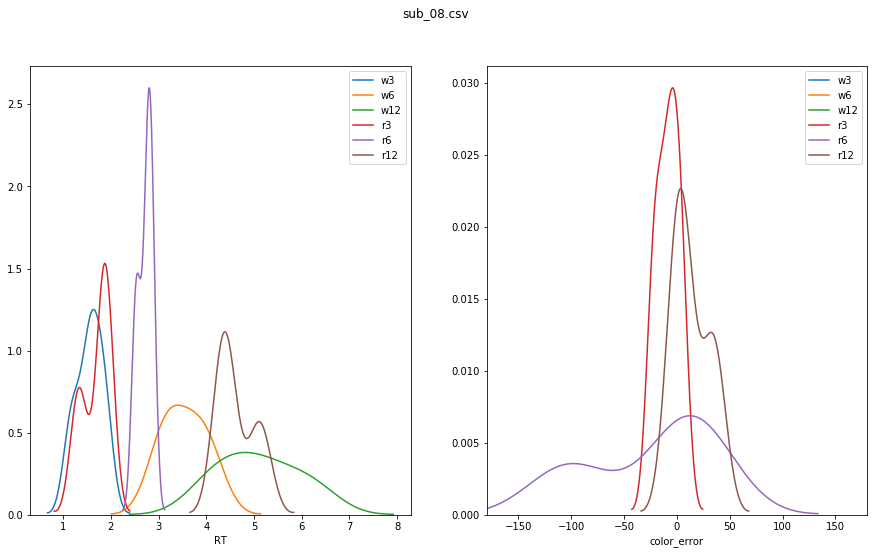

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


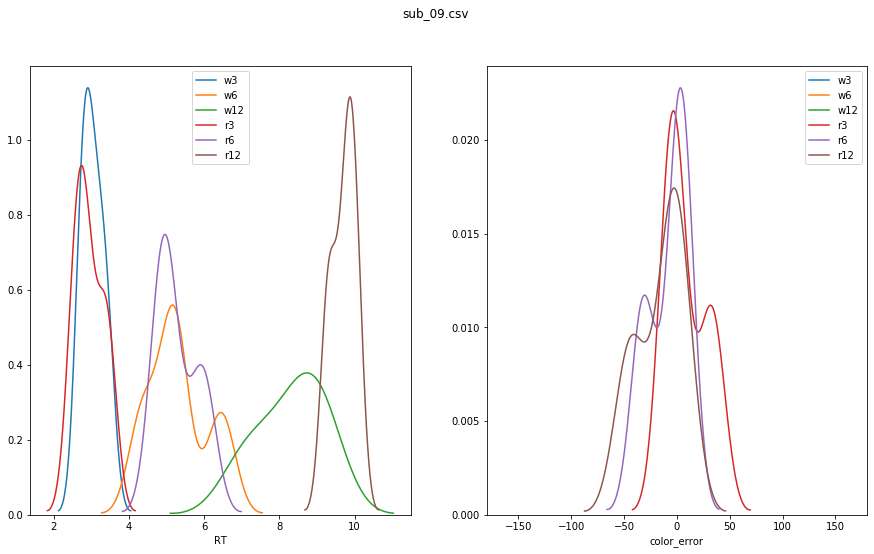

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


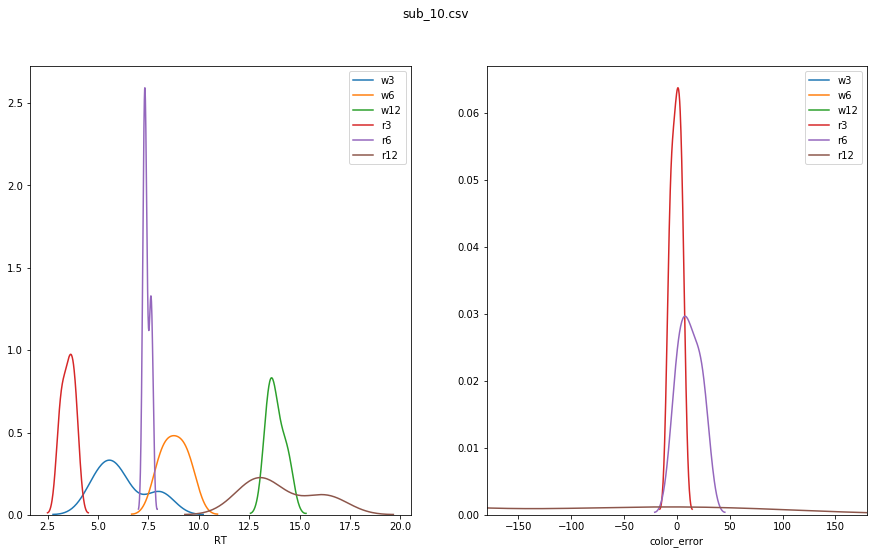

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


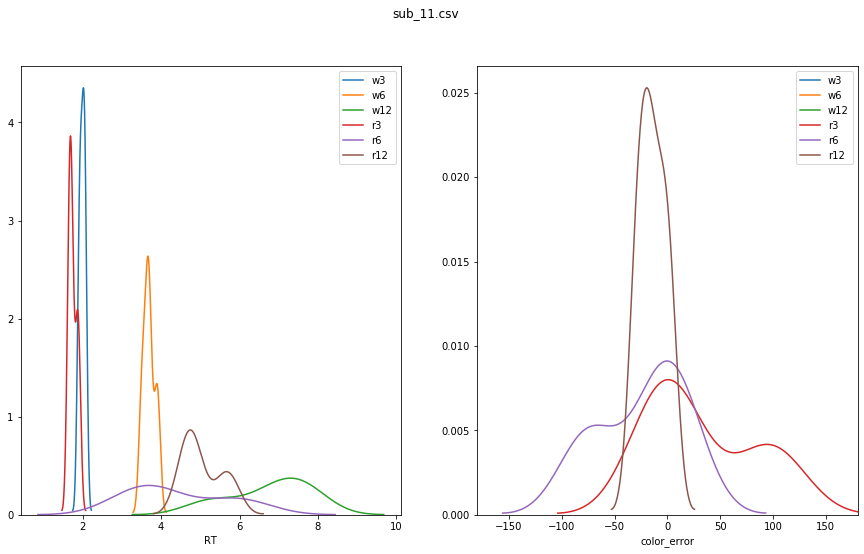

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


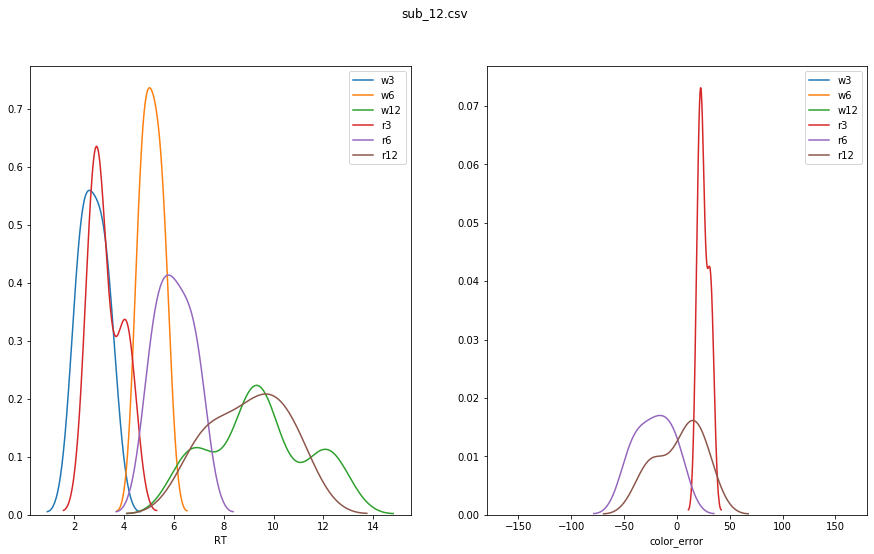

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


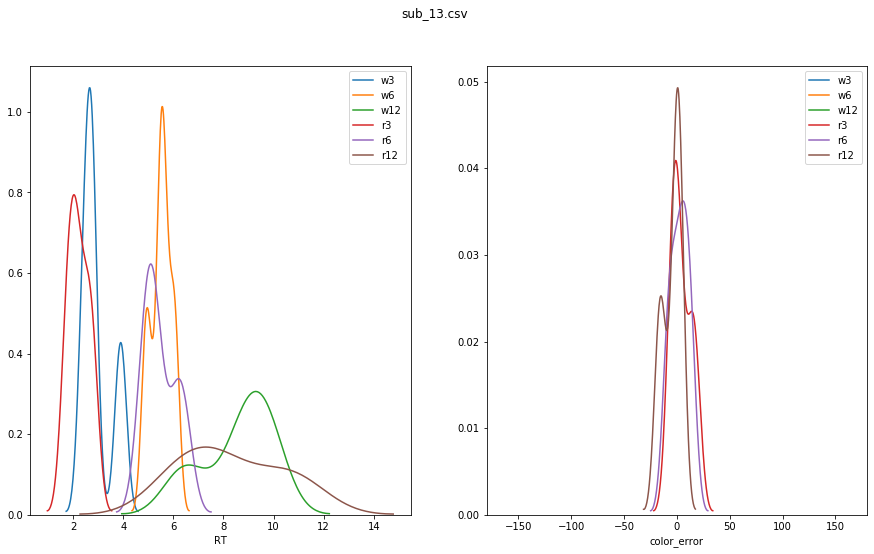

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


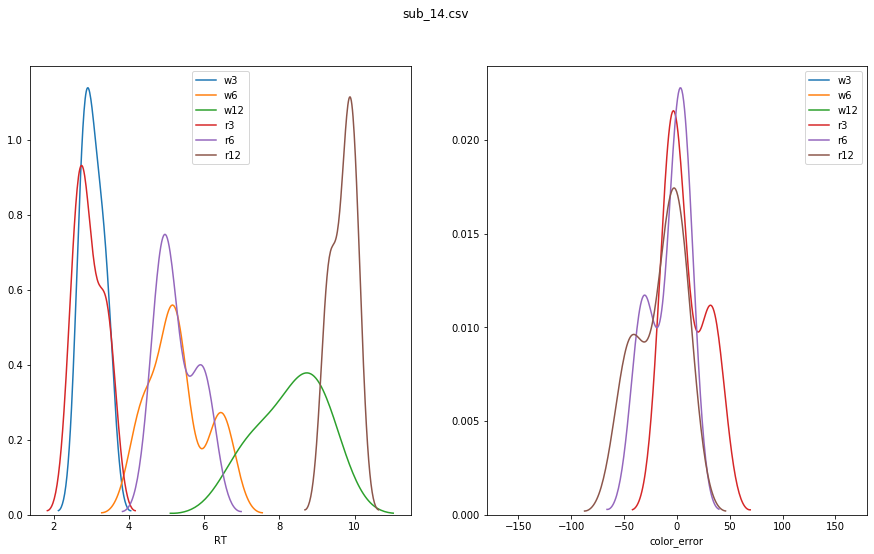

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


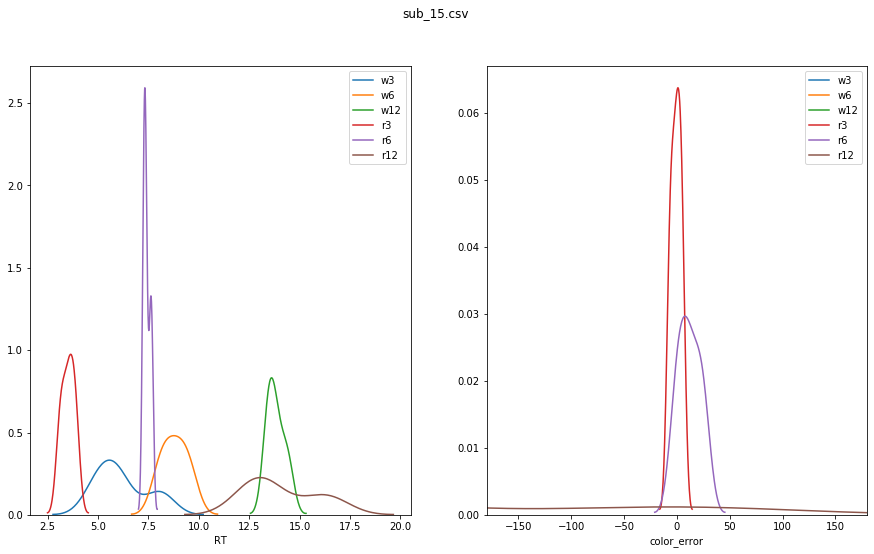

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


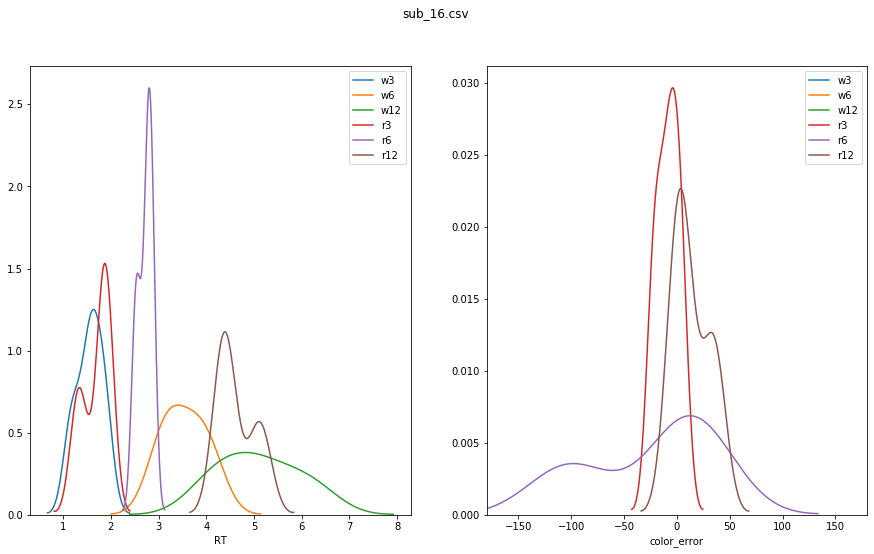

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


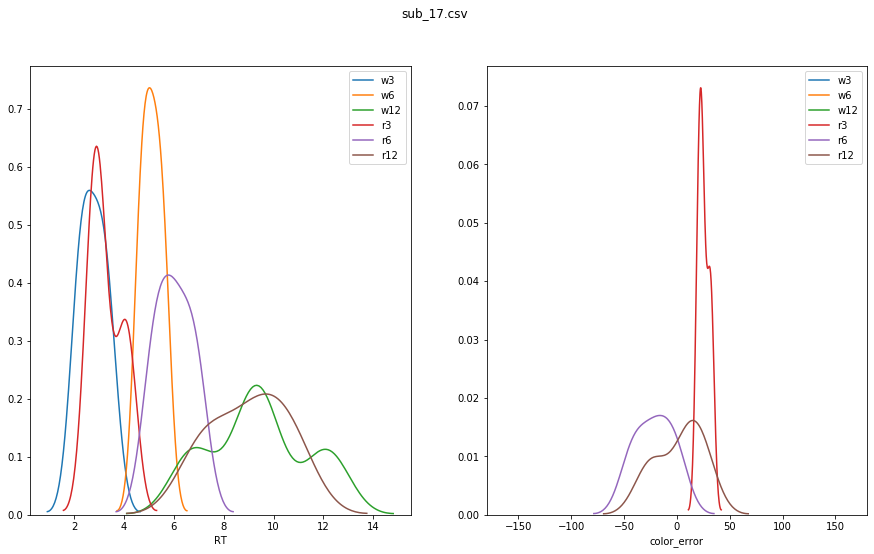

C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\kellnett\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


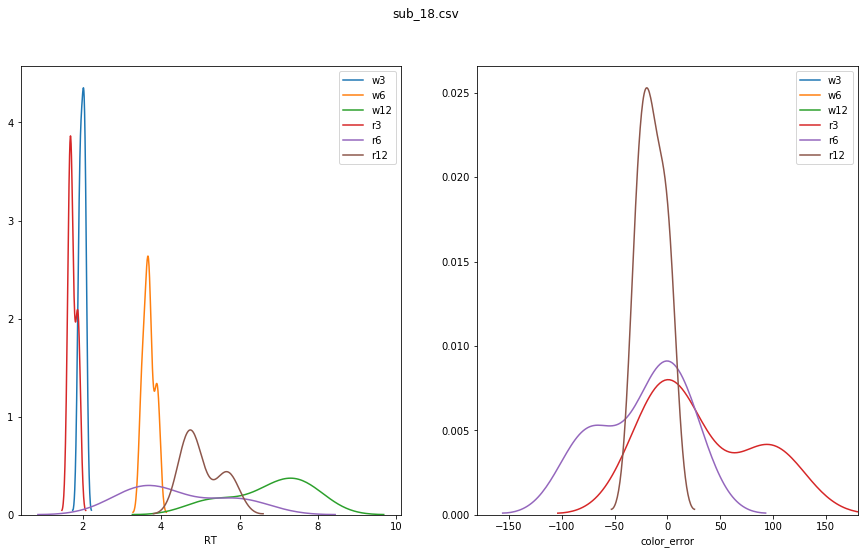

(108, 10)


In [17]:

#create an empty dataframe with column names ready
data = {'label':[], 'trial_interval':[], 'trial_color':[], 'rt_mean':[], 'rt_std':[], 'rt_error_mean':[], 'rt_error_std':[], 'color_error_mean':[], 'color_error_std':[], 'rating_congruency':[]}
df = pandas.DataFrame(data = data)

for i in range(1, 19):
    rt_mean, rt_std, rt_error_mean, rt_error_std, color_error_mean, color_error_std, rating_congruency = SubjectStats('sub_' + f"{i:02d}" + '.csv')
    
    #c1_idx = [ -1,   -1,    -1,    1,    1,     1]
    #c2_idx = [  3,    6,    12,    3,    6,    12]
    #labels = ['w3', 'w6', 'w12', 'r3', 'r6', 'r12']                                                                                                                  
    data = {'label':['w3', 'w6', 'w12', 'r3', 'r6', 'r12'], 'trial_interval':[3, 6, 12, 3, 6, 12], 'trial_color':[-1, -1, -1, 1, 1, 1], 'rt_mean':rt_mean, 'rt_std':rt_std, 'rt_error_mean':rt_error_mean, 'rt_error_std':rt_error_std, 'color_error_mean':color_error_mean, 'color_error_std':color_error_std, 'rating_congruency':rating_congruency}
    df1 = pandas.DataFrame(data = data)                                                                                    
    df = df.append(df1)
                                                                                                                      
print(df.shape)
df.to_csv('GroupData.csv')

<h1> Group-level analysis </h1>

In [109]:
#import groupdata file
df = pandas.read_csv('GroupData.csv')

df_no_headers = pandas.read_csv('GroupData.csv', header = None)

color_error_abs = np.abs(df.loc[:, "color_error_mean"])
df.loc[:, "color_error_abs"] = color_error_abs

rt_error_abs = np.abs(df.loc[:, 'rt_error_mean'])
df.loc[:, 'rt_error_abs'] = rt_error_abs


print(df.tail())

     Unnamed: 0 label  trial_interval  trial_color   rt_mean    rt_std  \
103           1    w6             6.0         -1.0  3.691575  0.138147   
104           2   w12            12.0         -1.0  6.767475  0.926653   
105           3    r3             3.0          1.0  1.748567  0.091603   
106           4    r6             6.0          1.0  4.422967  1.117927   
107           5   r12            12.0          1.0  5.056233  0.446665   

     rt_error_mean  rt_error_std  color_error_mean  color_error_std  \
103      -2.308425      0.138147          0.000000         0.000000   
104      -5.232525      0.926653          0.000000         0.000000   
105      -1.251433      0.091603         32.594033        46.199066   
106      -1.577033      1.117927        -24.236433        36.583767   
107      -6.943767      0.446665        -14.215500        11.134757   

     rating_congruency  color_error_abs  rt_error_abs  
103           1.000000         0.000000      2.308425  
104           0.

<h2> Visualization</h2>

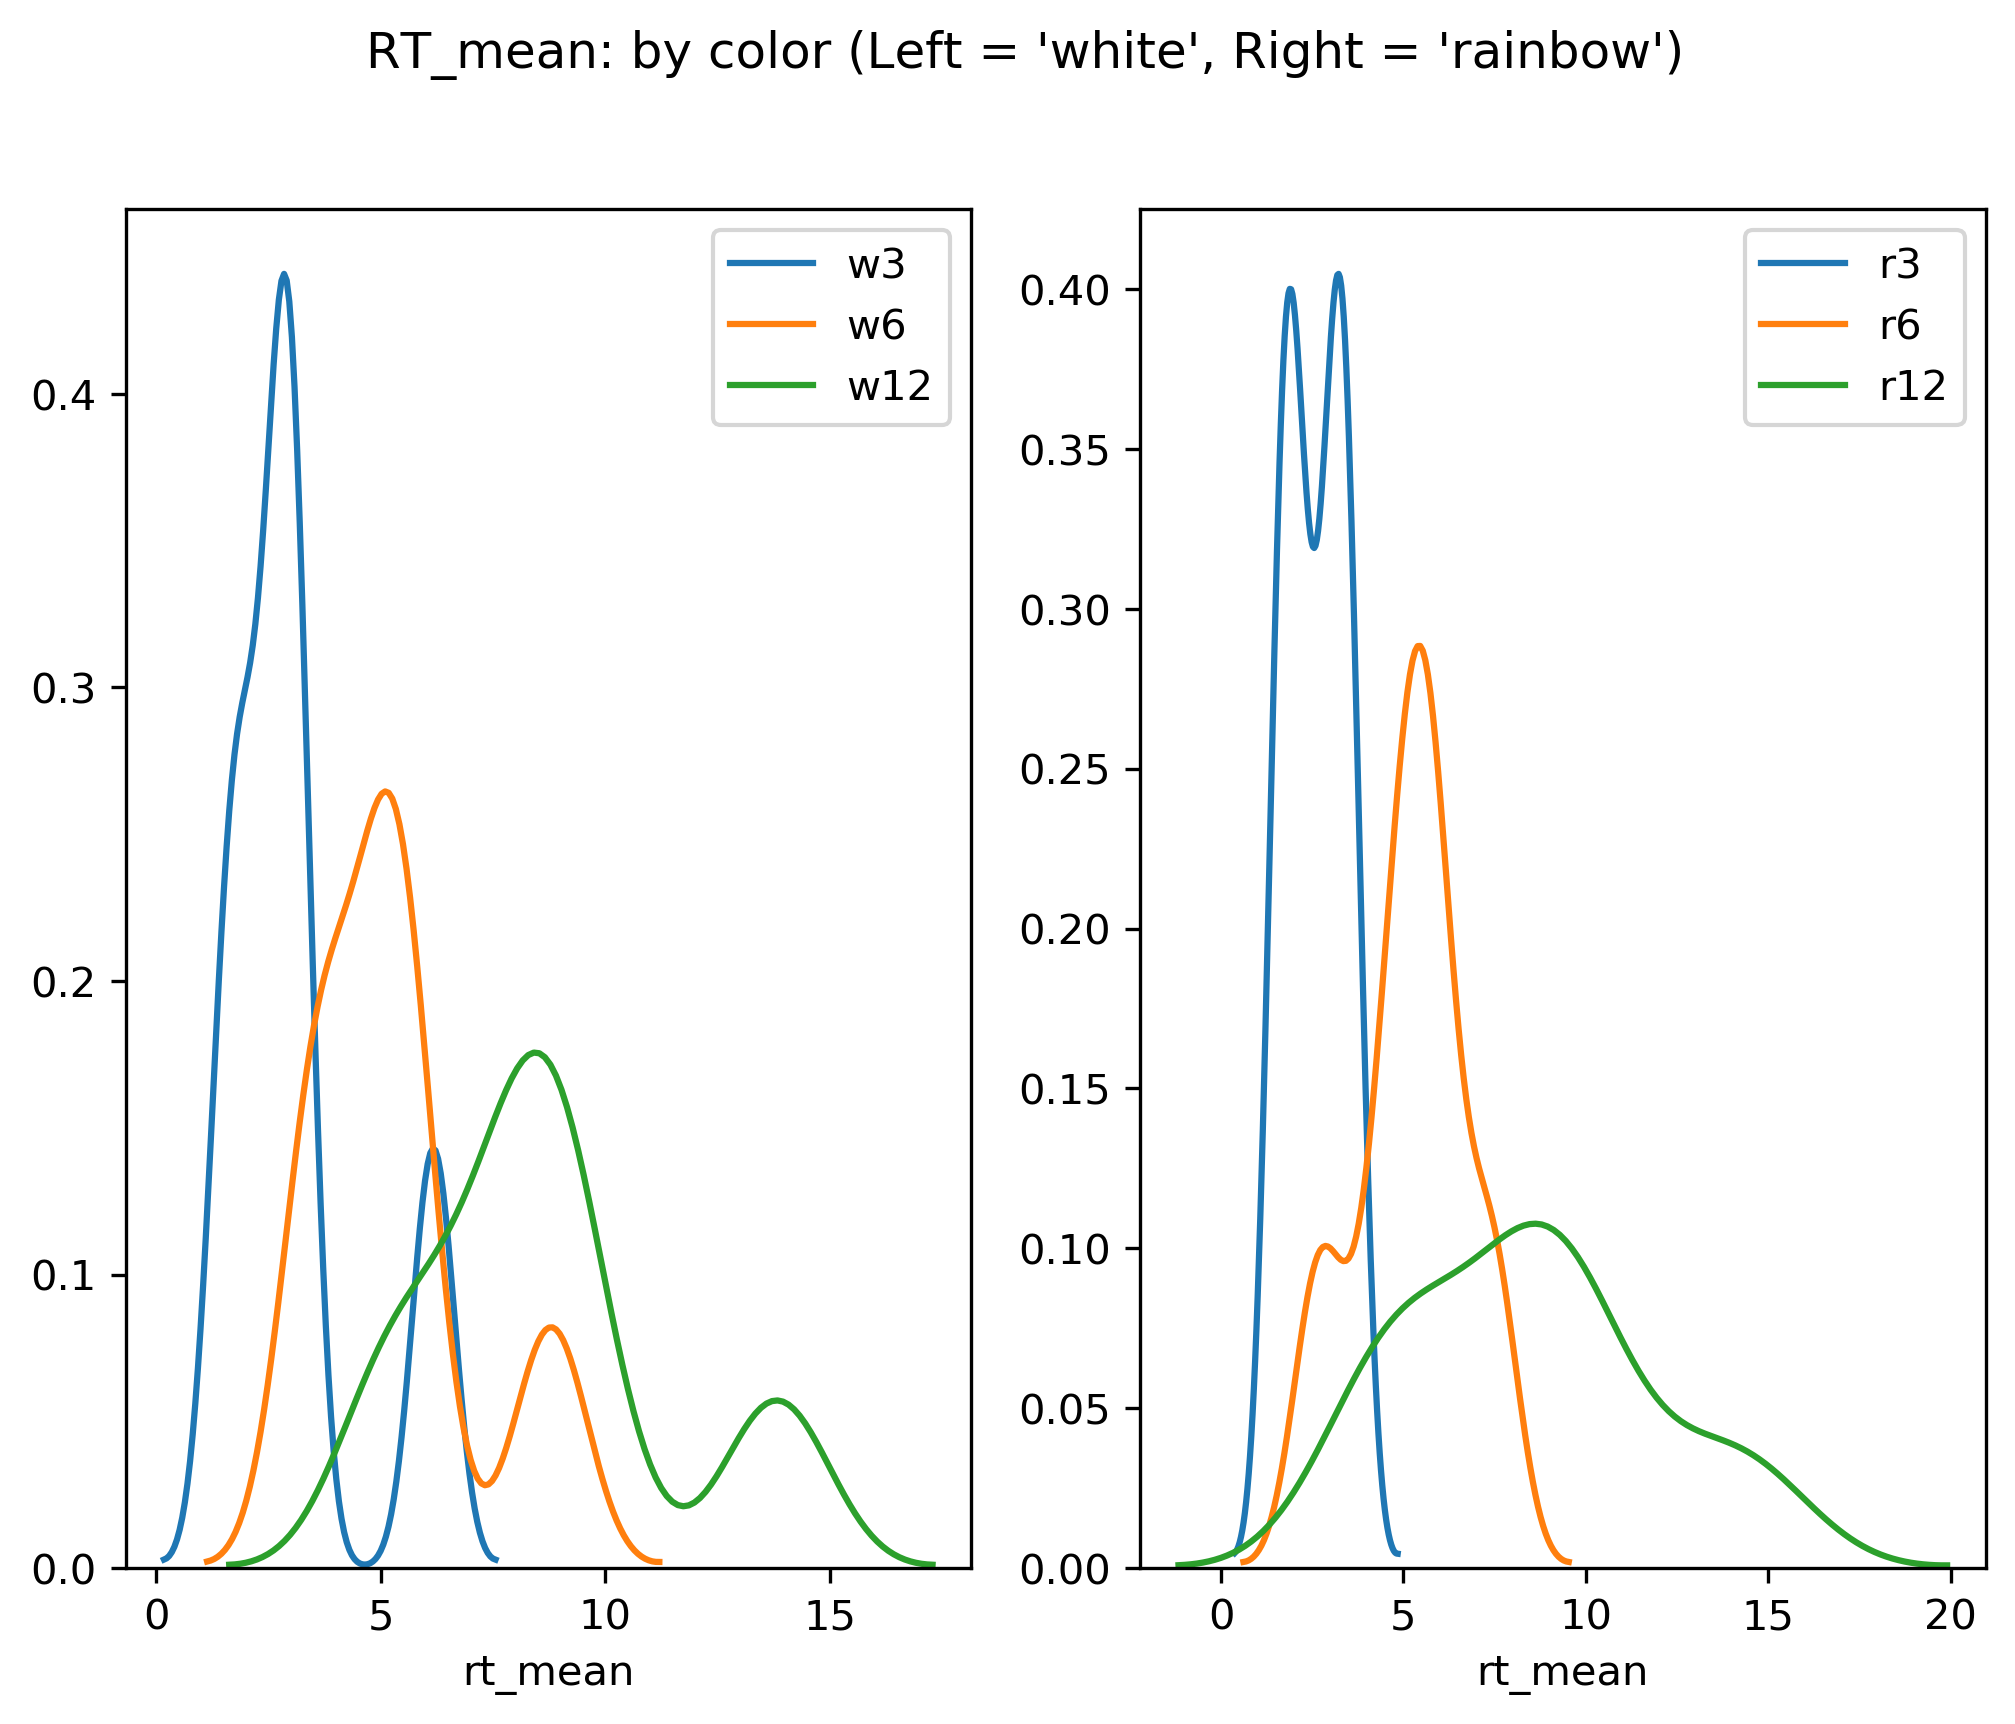

In [19]:
#visualize dist plots of RT by trial_color and interval
w3  = df.loc[(df.loc[:, 'trial_interval'] == 3) & (df.loc[:, 'trial_color'] == -1), :]
w6  = df.loc[(df.loc[:, 'trial_interval'] == 6) & (df.loc[:, 'trial_color'] == -1), :]
w12 = df.loc[(df.loc[:, 'trial_interval'] == 12) & (df.loc[:, 'trial_color'] == -1),:]

r3  = df.loc[(df.loc[:, 'trial_interval'] == 3) & (df.loc[:, 'trial_color'] == 1), :]
r6  = df.loc[(df.loc[:, 'trial_interval'] == 6) & (df.loc[:, 'trial_color'] == 1), :]
r12 = df.loc[(df.loc[:, 'trial_interval'] == 12) & (df.loc[:, 'trial_color'] == 1),:]

fig,axs = plt.subplots(ncols = 2, figsize =(8, 6), dpi = 300)

fig.suptitle('RT_mean: by color (Left = \'white\', Right = \'rainbow\')')

#visualize interval timing responses 
#white trials
sns.distplot(w3.loc[:,  'rt_mean'], hist=False, label='w3',  ax = axs[0])
sns.distplot(w6.loc[:,  'rt_mean'], hist=False, label='w6',  ax = axs[0])
sns.distplot(w12.loc[:, 'rt_mean'], hist=False, label='w12', ax = axs[0])

#rainbow trials
sns.distplot(r3.loc[:,  'rt_mean'], hist=False, label='r3',  ax = axs[1])
sns.distplot(r6.loc[:,  'rt_mean'], hist=False, label='r6',  ax = axs[1])
sns.distplot(r12.loc[:, 'rt_mean'], hist=False, label='r12', ax = axs[1])

plt.legend()
plt.show()

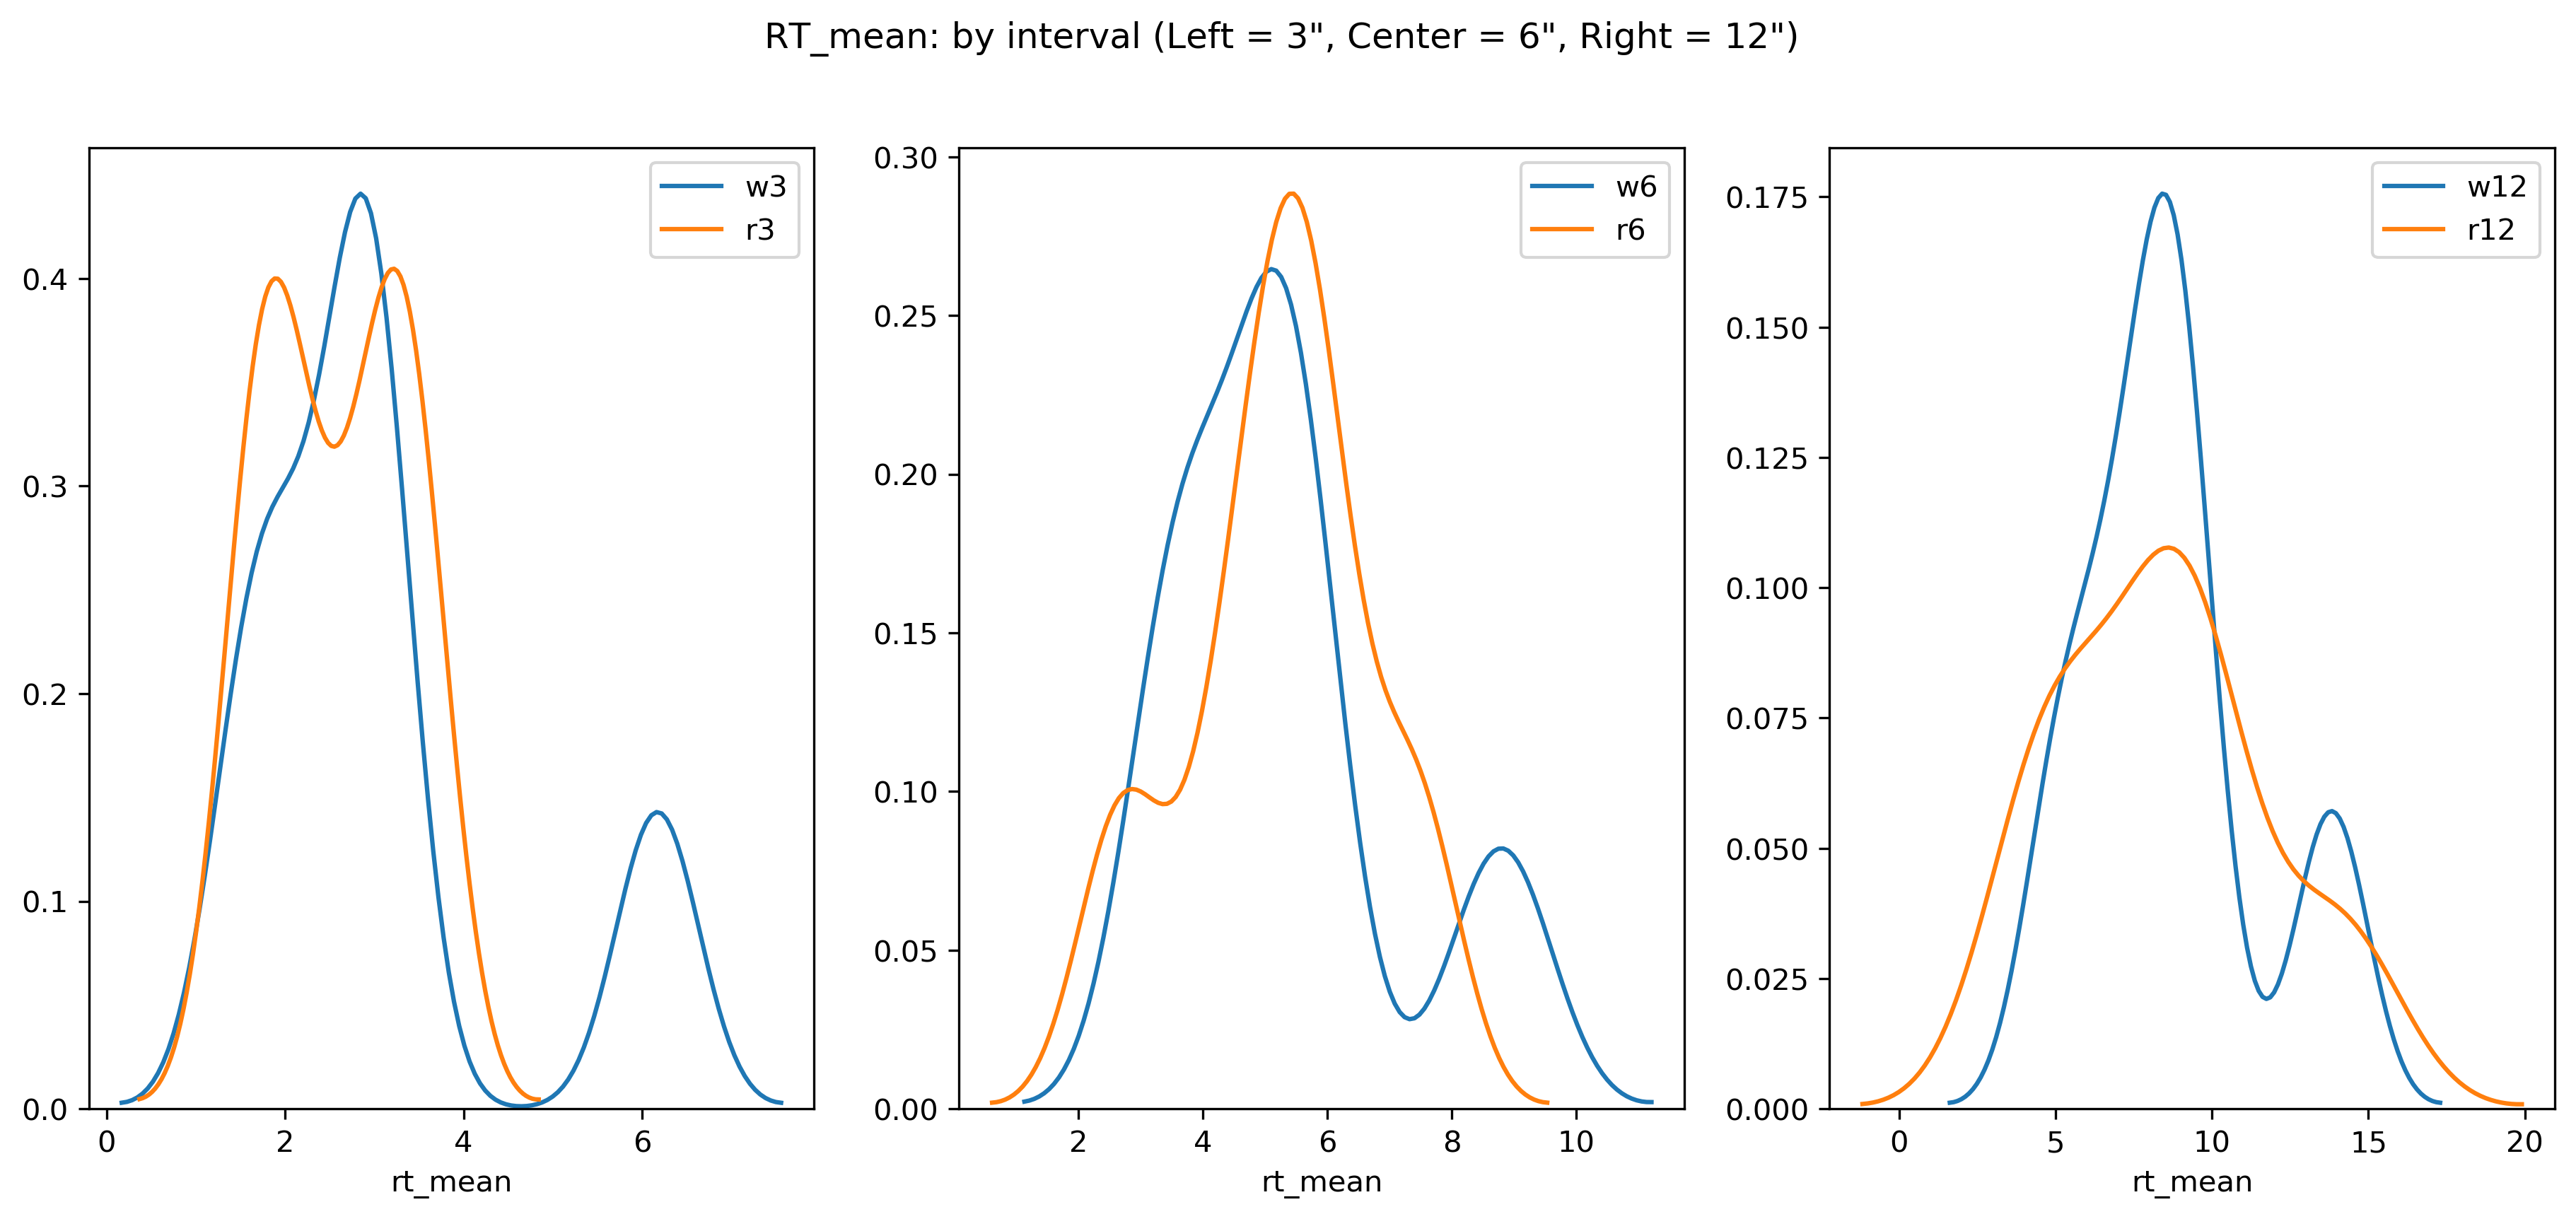

In [20]:
#visualize RT by interval
fig,axs = plt.subplots(ncols = 3, figsize =(15, 6), dpi = 300)

fig.suptitle('RT_mean: by interval (Left = 3\", Center = 6\", Right = 12\")')

#visualize interval timing responses 
#white trials
sns.distplot(w3.loc[:,  'rt_mean'], hist=False, label='w3',  ax = axs[0])
sns.distplot(w6.loc[:,  'rt_mean'], hist=False, label='w6',  ax = axs[1])
sns.distplot(w12.loc[:, 'rt_mean'], hist=False, label='w12', ax = axs[2])


#sns.violinplot(data = df, x = 'trial_interval', y = 'color_error_mean')

#rainbow trials
sns.distplot(r3.loc[:,  'rt_mean'], hist=False, label='r3',  ax = axs[0])
sns.distplot(r6.loc[:,  'rt_mean'], hist=False, label='r6',  ax = axs[1])
sns.distplot(r12.loc[:, 'rt_mean'], hist=False, label='r12', ax = axs[2])

plt.legend()
plt.show()

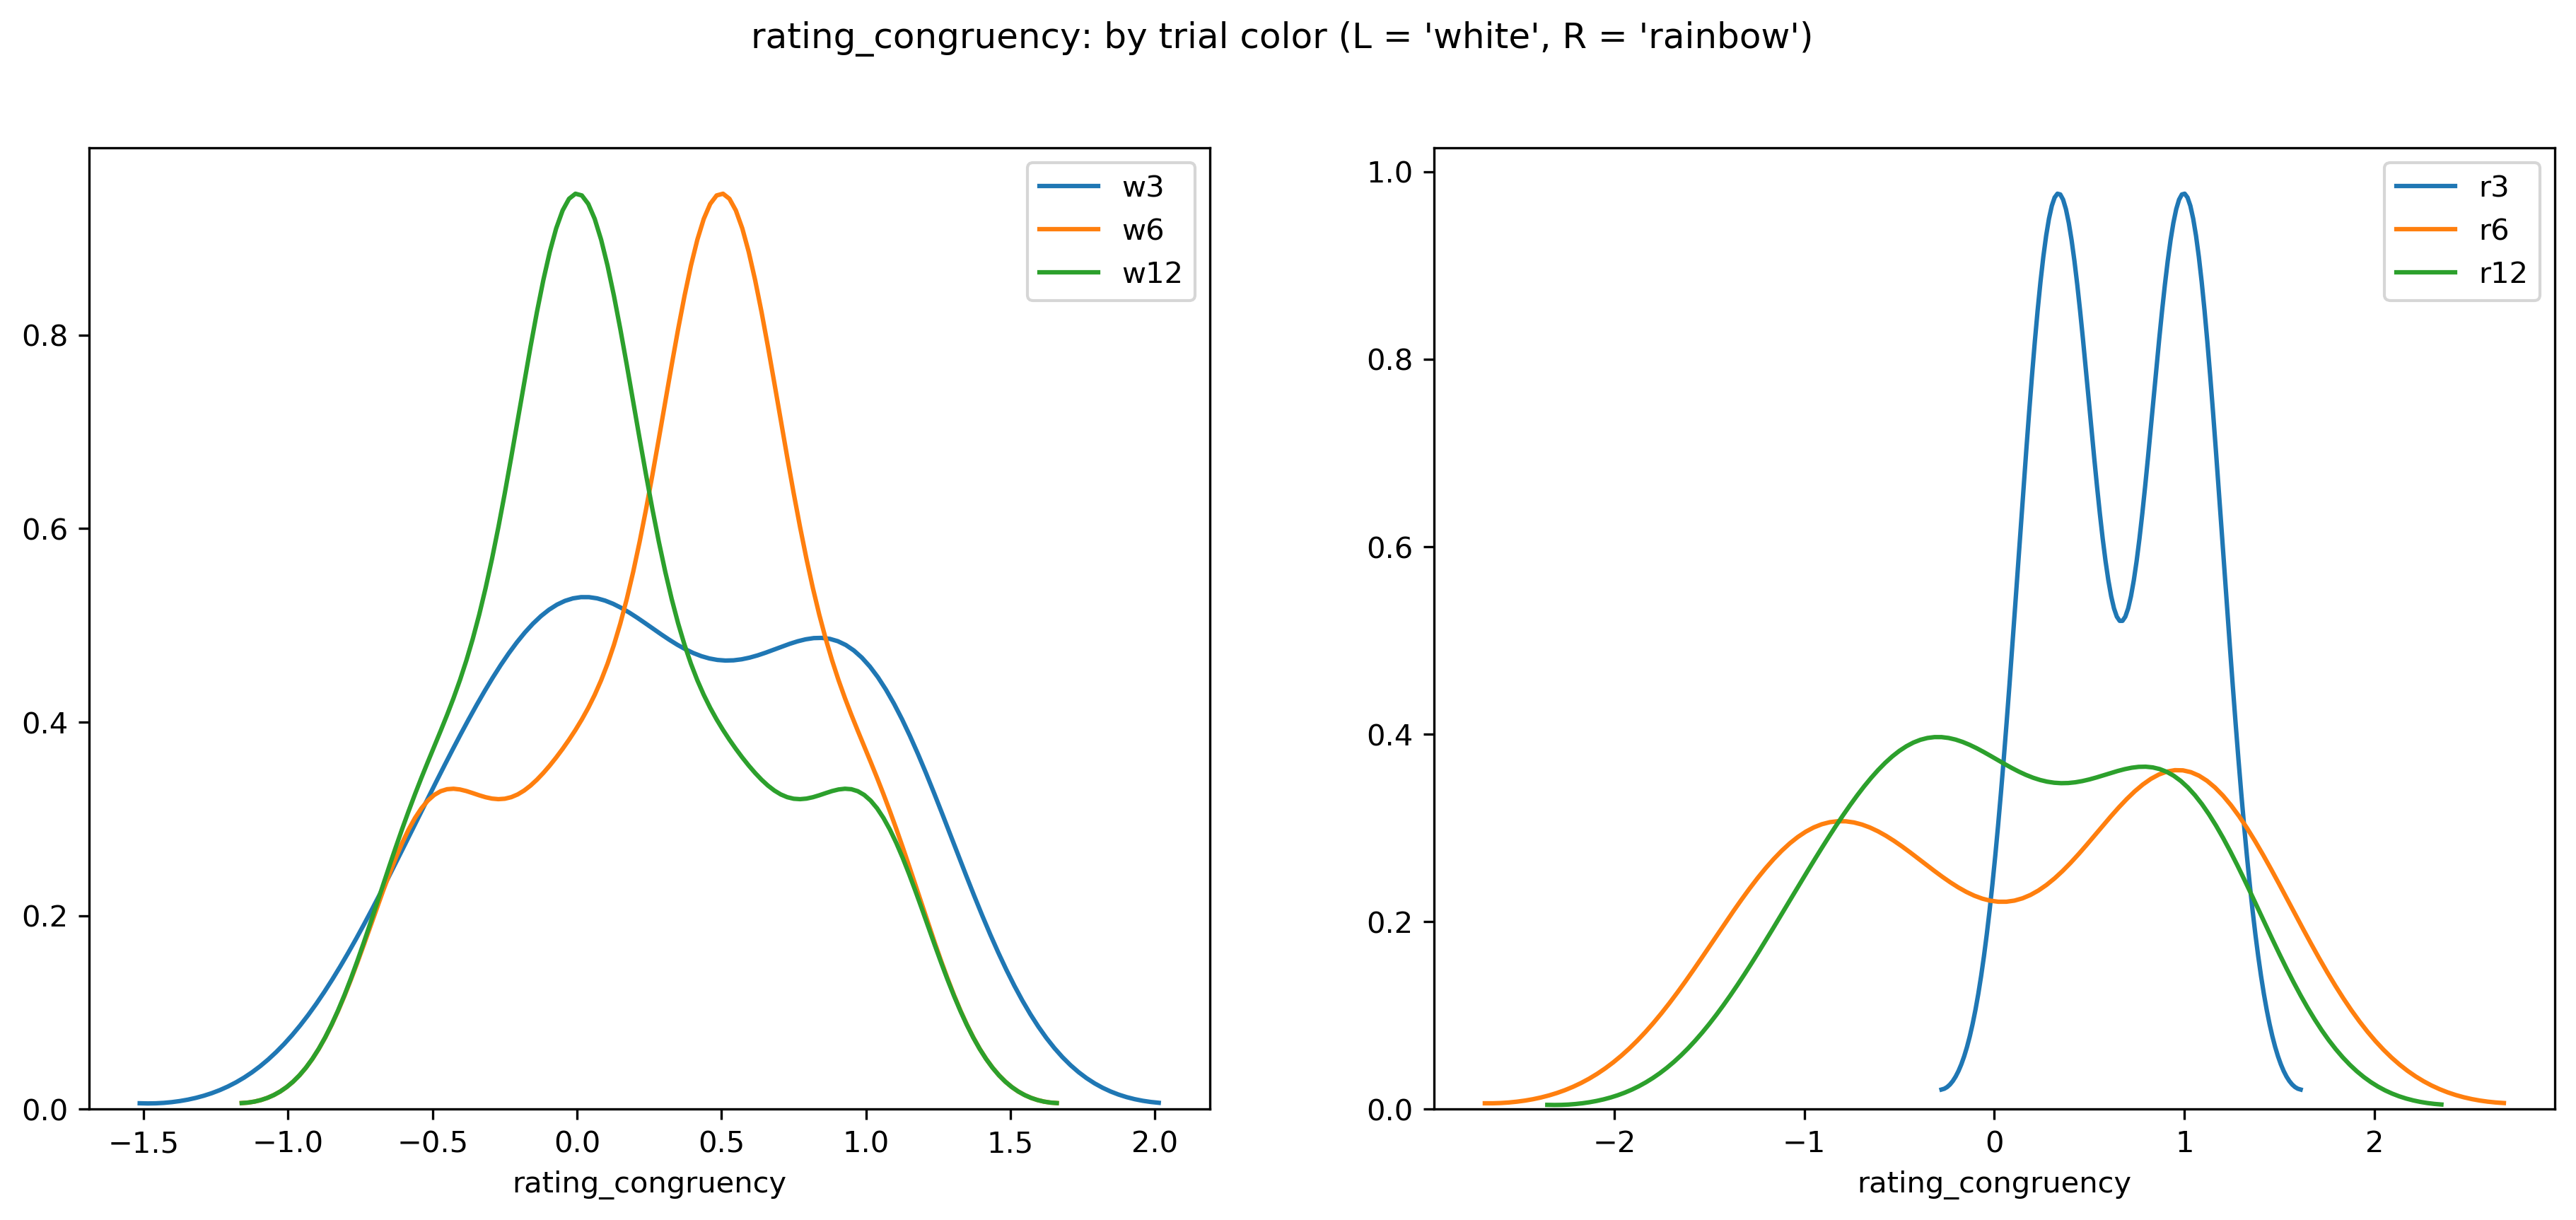

In [21]:
#visualize congruency rating by interval
fig,axs = plt.subplots(ncols = 2, figsize =(15, 6), dpi = 300)

fig.suptitle('rating_congruency: by trial color (L = \'white\', R = \'rainbow\')')

#visualize interval timing responses 
#white trials
sns.distplot(w3.loc[:,  'rating_congruency'], hist=False, label='w3',  ax = axs[0])
sns.distplot(w6.loc[:,  'rating_congruency'], hist=False, label='w6',  ax = axs[0])
sns.distplot(w12.loc[:, 'rating_congruency'], hist=False, label='w12', ax = axs[0])


#sns.violinplot(data = df, x = 'trial_interval', y = 'color_error_mean')

#rainbow trials
sns.distplot(r3.loc[:,  'rating_congruency'], hist=False, label='r3',  ax = axs[1])
sns.distplot(r6.loc[:,  'rating_congruency'], hist=False, label='r6',  ax = axs[1])
sns.distplot(r12.loc[:, 'rating_congruency'], hist=False, label='r12', ax = axs[1])

plt.legend()
plt.show()

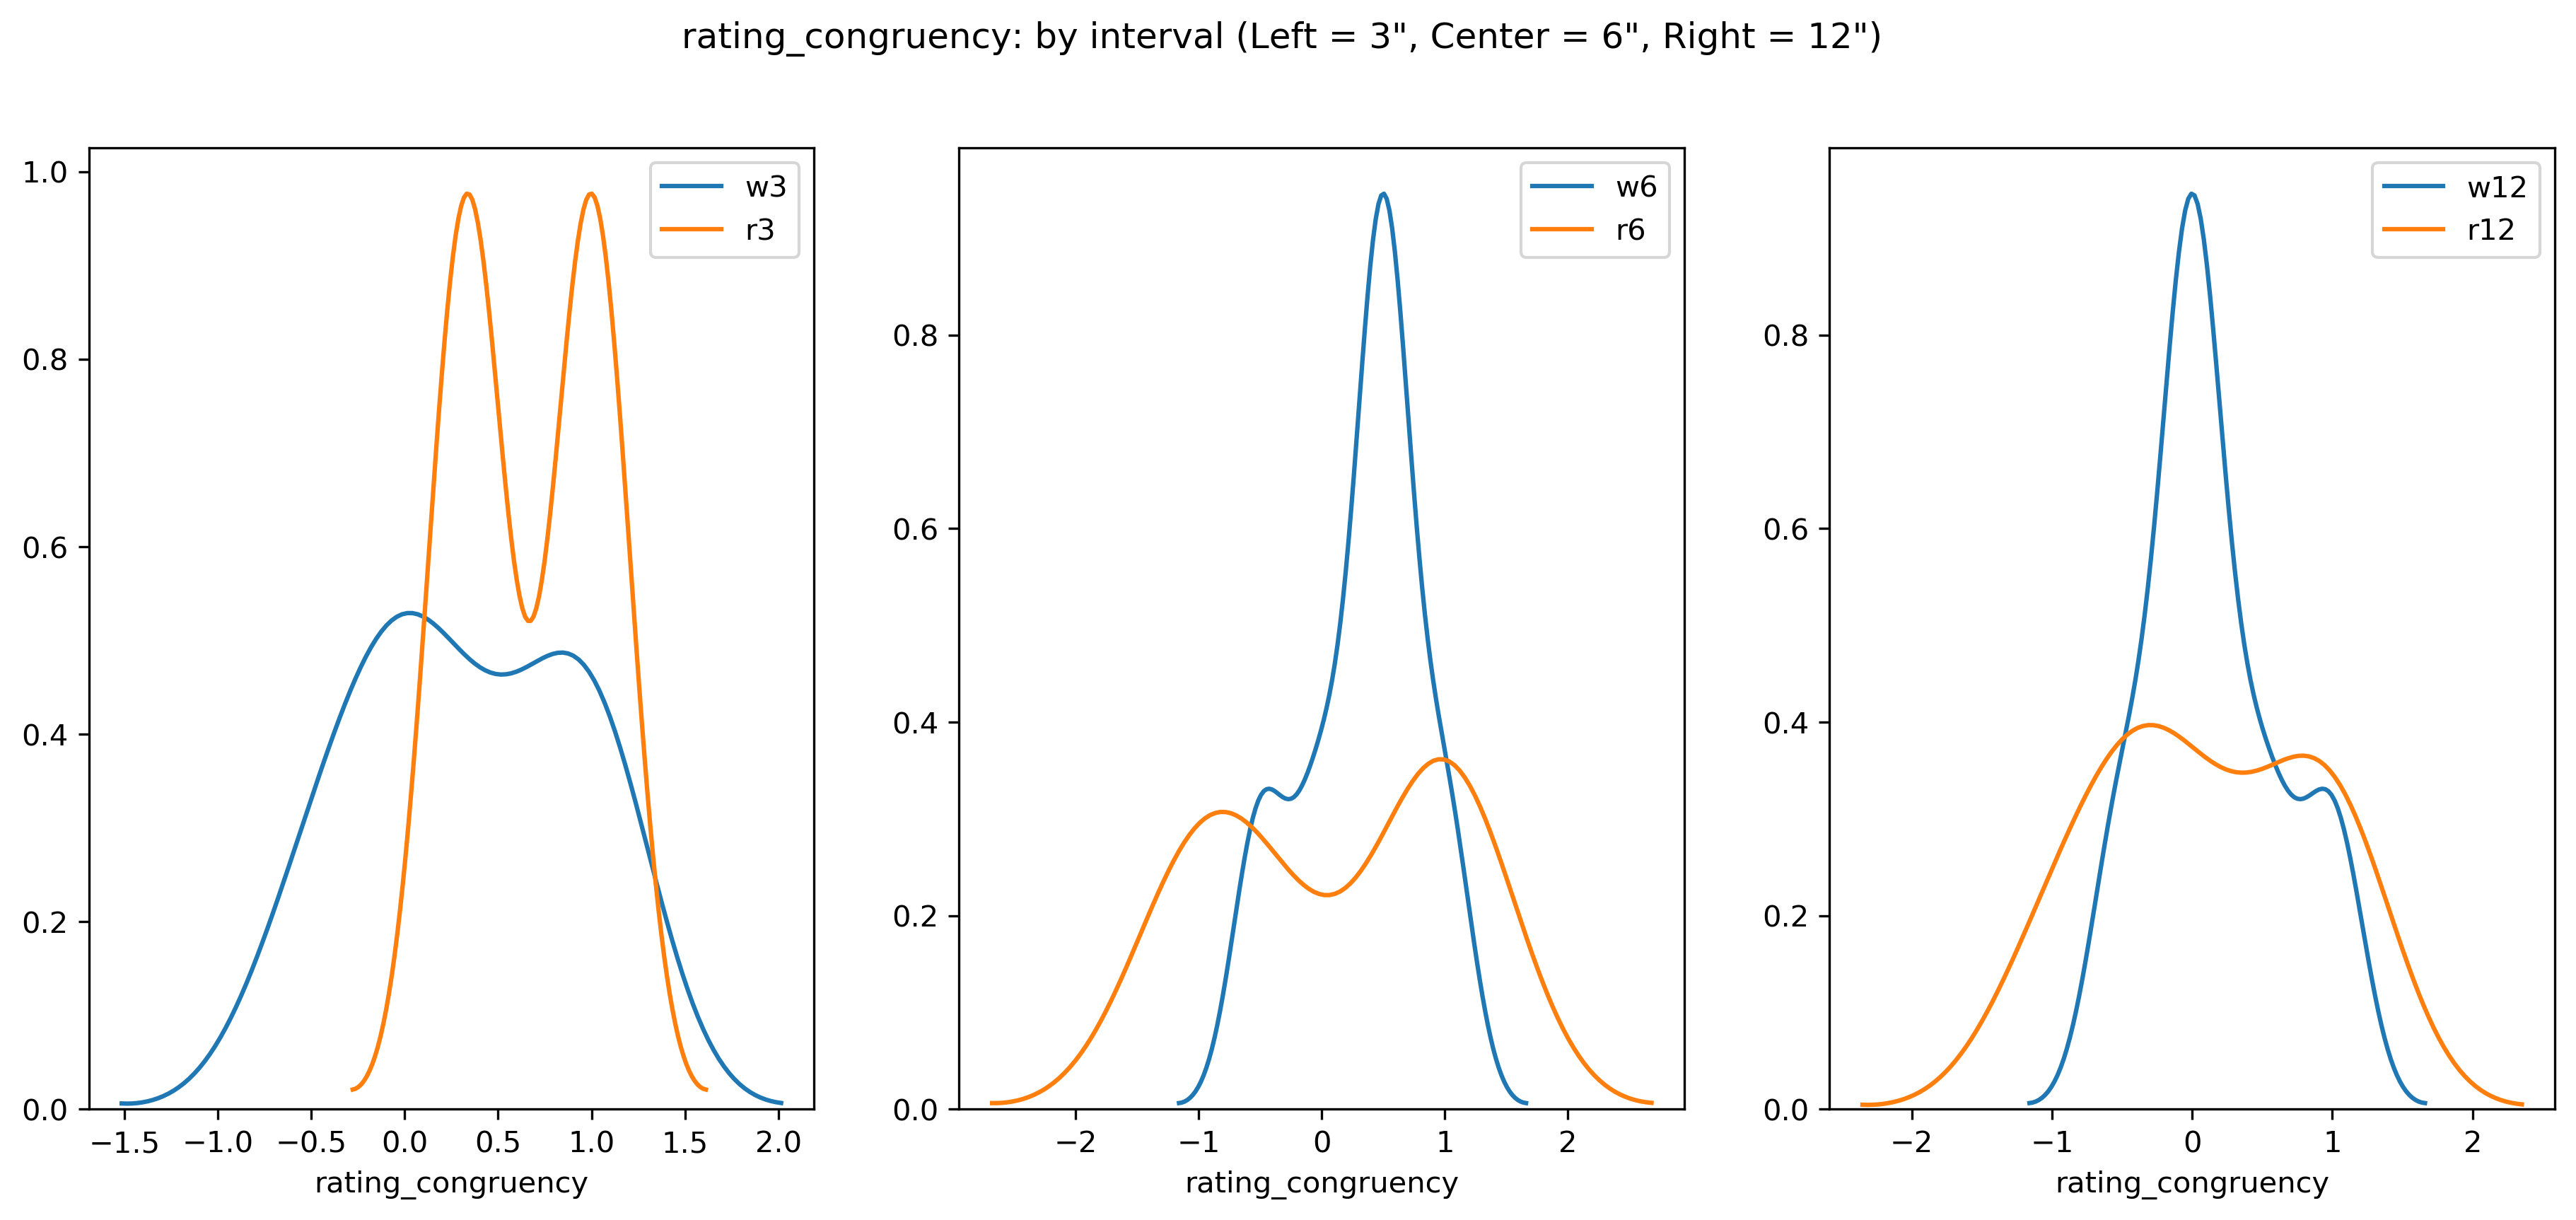

In [22]:
#visualize rating_congruency by interval
fig,axs = plt.subplots(ncols = 3, figsize =(15, 6), dpi = 300)

fig.suptitle('rating_congruency: by interval (Left = 3\", Center = 6\", Right = 12\")')

#visualize interval timing responses 
#white trials
sns.distplot(w3.loc[:,  'rating_congruency'], hist=False, label='w3',  ax = axs[0])
sns.distplot(w6.loc[:,  'rating_congruency'], hist=False, label='w6',  ax = axs[1])
sns.distplot(w12.loc[:, 'rating_congruency'], hist=False, label='w12', ax = axs[2])


#sns.violinplot(data = df, x = 'trial_interval', y = 'color_error_mean')

#rainbow trials
sns.distplot(r3.loc[:,  'rating_congruency'], hist=False, label='r3',  ax = axs[0])
sns.distplot(r6.loc[:,  'rating_congruency'], hist=False, label='r6',  ax = axs[1])
sns.distplot(r12.loc[:, 'rating_congruency'], hist=False, label='r12', ax = axs[2])

plt.legend()
plt.show()

<h1>Stats</h1>

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

<h3> RT_error stats </h3>

- 2-way ANOVA within (color x interval)
- Post hoc t-tests for effect of interval

- redone with rt_error_abs 


2-way ANOVA: my calculations
                    sum_sq   df         F       PR(>F)
trial_color       0.402900    1  0.205904     0.650961
trial_interval  215.398199    2   55.0402  6.12476e-17
color:interval   -2.964541    2 -0.757522            1
Residual        199.587131  102       NaN          NaN

2-way ANOVA: package calculations
                                      sum_sq     df          F        PR(>F)
C(trial_color)                      0.402900    1.0   0.211329  6.467065e-01
C(trial_interval)                 215.398199    2.0  56.490233  3.063795e-17
C(trial_color):C(trial_interval)    2.158742    2.0   0.566151  5.694801e-01
Residual                          194.463848  102.0        NaN           NaN


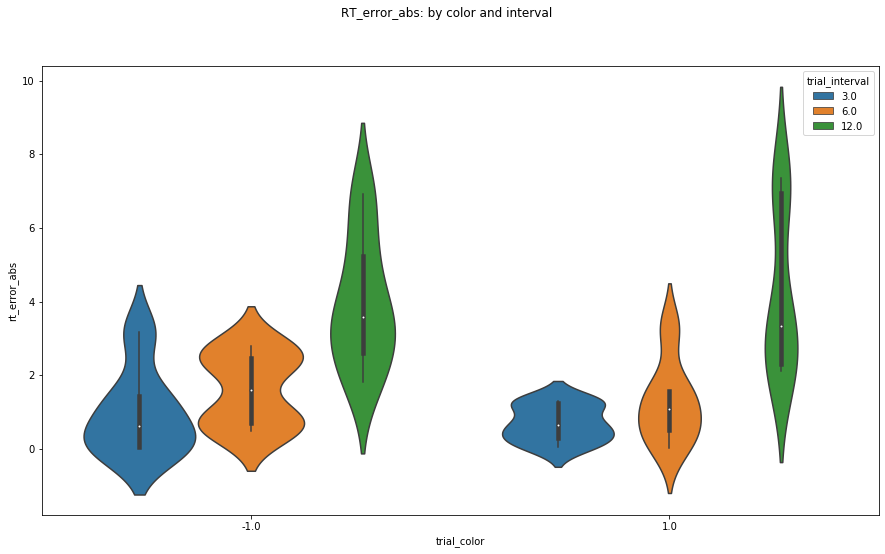

           t-stat       p value
3 v. 6  -5.251276  7.498255e-06
3 v. 12 -9.801214  1.429969e-11
6 v. 12 -9.584665  2.542097e-11


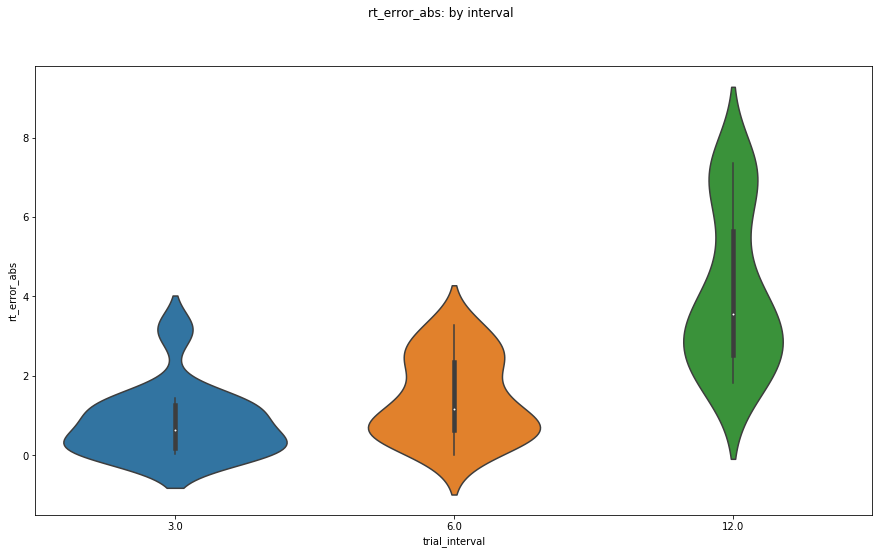

In [111]:
#2-way ANOVA for rt_error_mean 1) Trial_color (-1 or 1), 2)Trial_interval (3, 6, 12)
#within subjects


#variables in each factor
#factor a =  trial_color
v_a = 2

#factor b = trial_interval
v_b = 3

#find df
N = len(df.rt_error_abs)

df_a = v_a - 1
df_b = v_b - 1
df_axb = df_a * df_b
df_w = N - (v_a * v_b)

#calculate grand mean
grand_mean = df['rt_error_abs'].mean()

#Sum of Squares
ssq_a = sum([(df[df.trial_color == i].rt_error_abs.mean() - grand_mean)**2 for i in df.trial_color])
ssq_b = sum([(df[df.trial_interval == i].rt_error_abs.mean() - grand_mean)**2 for i in df.trial_interval])

#total ssq
ssq_t = sum((df.rt_error_abs - grand_mean)**2)

#ssq residual
w = df[df.trial_color == -1]
r = df[df.trial_color == 1]
w_interval_means = [w[w.trial_interval == i].rt_error_abs.mean() for i in w.trial_interval]
r_interval_means = [r[r.trial_interval == i].rt_error_abs.mean() for i in r.trial_interval]

ssq_w = sum((r.rt_error_abs - r_interval_means)**2) + sum((w.rt_error_abs - r_interval_means)**2)

#ssq interaction
ssq_axb = ssq_t - ssq_a - ssq_b - ssq_w

#calculate mean squares
ms_a = ssq_a / df_a
ms_b = ssq_b / df_b
ms_axb = ssq_axb / df_axb
ms_w = ssq_w / df_w

#calculate F-ratio
f_a = ms_a / ms_w
f_b = ms_b / ms_w
f_axb = ms_axb / ms_w

#calculate p values for each f-ratio
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

#create DataFrame with more readable results
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
           'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns = ['sum_sq', 'df', 'F', 'PR(>F)']

aov_table1 = pandas.DataFrame(results, columns = columns, index = ['trial_color', 'trial_interval', 'color:interval', 'Residual'])
print('')
print('2-way ANOVA: my calculations')
print(aov_table1)

#check calculates with Statsmodel package
formula = 'rt_error_abs ~ C(trial_color) + C(trial_interval) + C(trial_color):C(trial_interval)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ = 2)
print('')
print('2-way ANOVA: package calculations')
print(aov_table)

#not sure why values are slightly off between my calculates and Statsmodel package
#may be a rounding issue, results still mean the same for each.
#RT_error_mean by trial interval
fig, axs = plt.subplots(ncols = 1, figsize = (15, 8.25))
fig.suptitle('RT_error_abs: by color and interval')

sns.violinplot(data = df, x = 'trial_color', y = 'rt_error_abs', hue='trial_interval')
plt.show()


#post hoc t-tests of RT_error by intervals (w and r combined here bc no significance)
three  = df.loc[df.loc[:, 'trial_interval'] == 3, 'rt_error_abs']
six    = df.loc[df.loc[:, 'trial_interval'] == 6, 'rt_error_abs']
twelve = df.loc[df.loc[:, 'trial_interval'] == 12,'rt_error_abs']

dif = three.to_numpy() - six.to_numpy()
t1, p1 = stats.ttest_1samp(dif, 0)

dif = three.to_numpy() - twelve.to_numpy()
t2, p2 = stats.ttest_1samp(dif, 0)

dif = six.to_numpy() - twelve.to_numpy()
t3, p3 = stats.ttest_1samp(dif, 0)

#create DataFrame with more readable results
t_results = {'t-stat':[t1, t2, t3],
           'p value':[p1, p2, p3]}
t_columns = ['t-stat', 'p value']
t_table = pandas.DataFrame(t_results, columns = t_columns, index = ['3 v. 6', '3 v. 12', '6 v. 12'])
print(t_table)

fig, axs = plt.subplots(ncols = 1, figsize = (15, 8.25))
fig.suptitle('rt_error_abs: by interval')

sns.violinplot(data = df, x = 'trial_interval', y = 'rt_error_abs')
plt.show()


<h2> Color_error stats </h2>

- 1-way ANOVA by trial interval
- Post-hoc t tests 


1-way ANOVA:
f-stat  = 1.3493011449616488
p-value = 0.2690828523463203


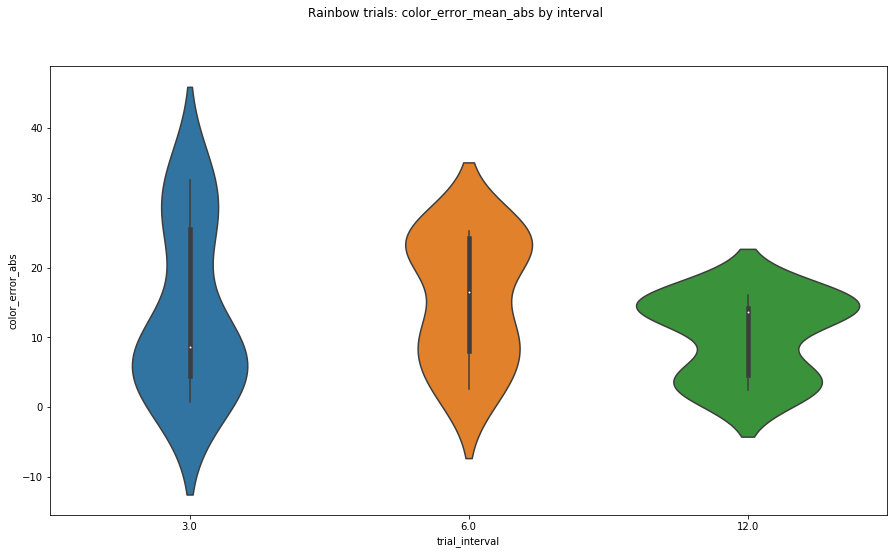


1-way ANOVA:
f-stat  = 2.2091396951312277
p-value = 0.12083797142165821


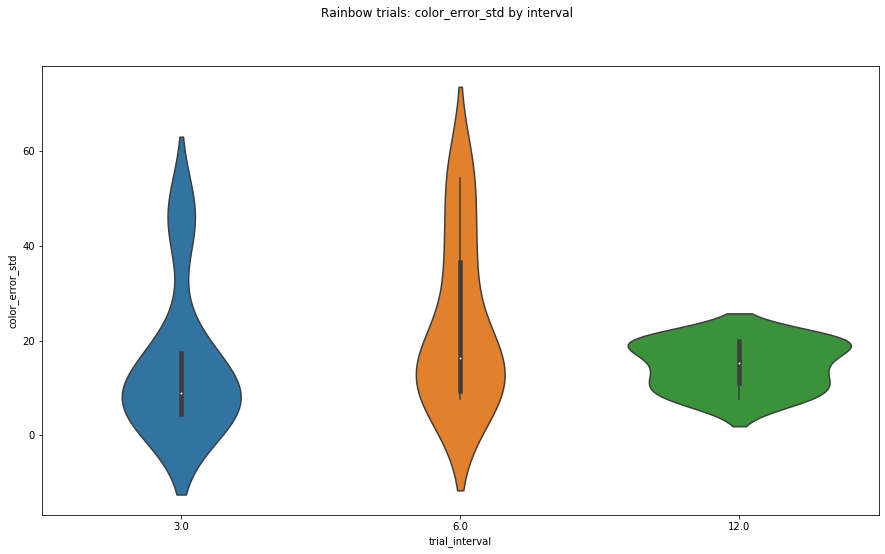

In [108]:
#1-way ANOVA for color_error in r trials---re-done without outlier

r = df_new[df_new.trial_color == 1]
r3 = r[r.trial_interval==3]
r6 = r[r.trial_interval==6]
r12 = r[r.trial_interval==12]

f, p = stats.f_oneway(r3.color_error_abs, r6.color_error_abs, r12.color_error_abs)
print('')
print('1-way ANOVA:')
fStat= 'f-stat  = ' + str(f)
pVal = 'p-value = ' + str(p)
print(fStat)
print(pVal)


fig, axs = plt.subplots(ncols = 1, figsize = (15, 8.25))
fig.suptitle('Rainbow trials: color_error_mean_abs by interval')

sns.violinplot(data = r, x = 'trial_interval', y = 'color_error_abs')
plt.show()

#1-way ANOVA for color_erro_std in r trials---re-done without outlier

r = df_new[df_new.trial_color == 1]
r3 = r[r.trial_interval==3]
r6 = r[r.trial_interval==6]
r12 = r[r.trial_interval==12]

f, p = stats.f_oneway(r3.color_error_std, r6.color_error_std, r12.color_error_std)
print('')
print('1-way ANOVA:')
fStat= 'f-stat  = ' + str(f)
pVal = 'p-value = ' + str(p)
print(fStat)
print(pVal)


fig, axs = plt.subplots(ncols = 1, figsize = (15, 8.25))
fig.suptitle('Rainbow trials: color_error_std by interval')

sns.violinplot(data = r, x = 'trial_interval', y = 'color_error_std')
plt.show()

<h4> Rating Congruency Stats </h4>

- 2-way ANOVA within (color x interval)
- Post-hoc t test on interval (r and w trials combined)


2-way ANOVA: my calculations
                   sum_sq   df          F     PR(>F)
trial_color      0.009259    1  0.0217949   0.882926
trial_interval   2.574074    2    3.02949  0.0527116
color:interval  -1.481481    2   -1.74359          1
Residual        43.333333  102        NaN        NaN

2-way ANOVA: package calculations
                                     sum_sq     df         F    PR(>F)
C(trial_color)                     0.009259    1.0  0.023384  0.878765
C(trial_interval)                  2.574074    2.0  3.250344  0.042811
C(trial_color):C(trial_interval)   1.462963    2.0  1.847318  0.162895
Residual                          40.388889  102.0       NaN       NaN


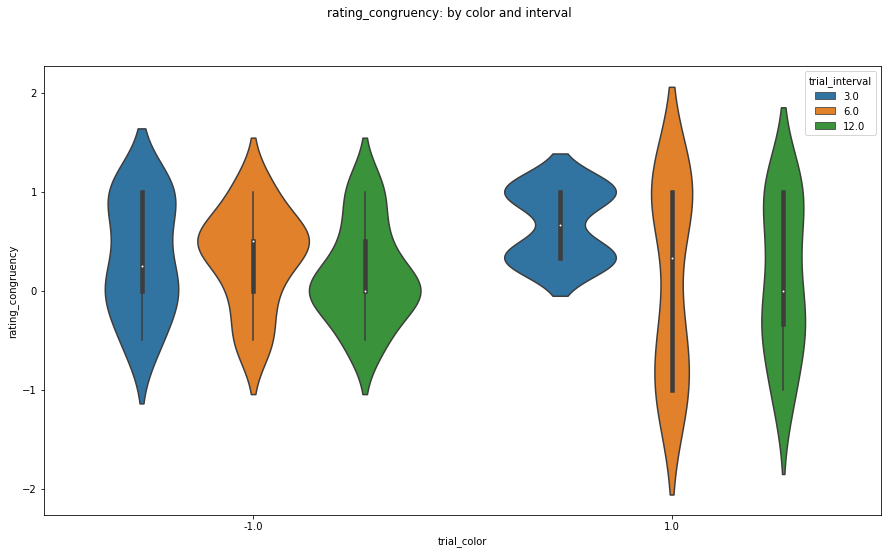

post-hoc t-tests
           t stat   p value
3 v. 6   2.099538  0.043049
3 v. 12  2.904814  0.006329
6 v. 12  0.539313  0.593085


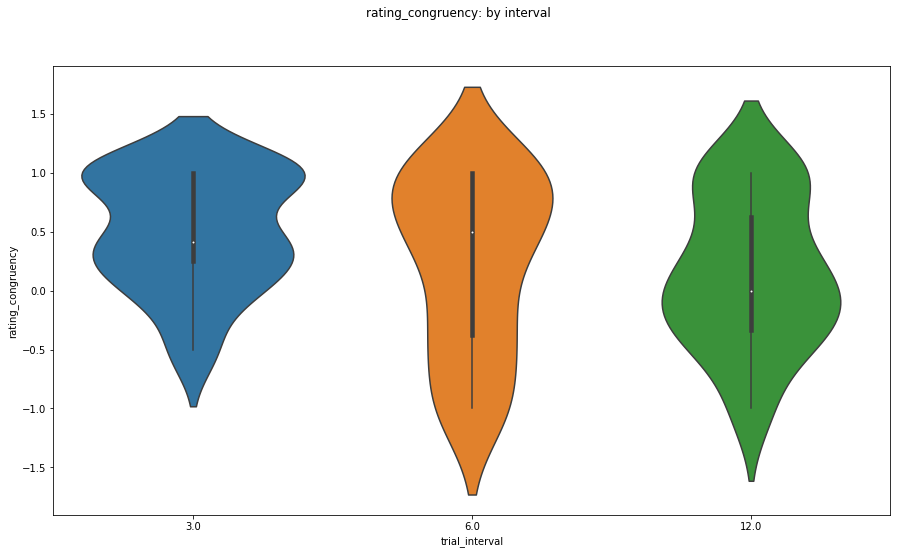

In [26]:
#2-way ANOVA on rating_congruency

#factor a = trial_color
v_a = 2

#factor b = trial_interval
v_b = 3

#find df
N = len(df.rating_congruency)

df_a = v_a - 1
df_b = v_b - 1
df_axb = df_a * df_b
df_w = N - (v_a * v_b)

#calculate grand mean
grand_mean = df['rating_congruency'].mean()

#Sum of Squares
ssq_a = sum([(df[df.trial_color == i].rating_congruency.mean() - grand_mean)**2 for i in df.trial_color])
ssq_b = sum([(df[df.trial_interval == i].rating_congruency.mean() - grand_mean)**2 for i in df.trial_interval])

#total ssq
ssq_t = sum((df.rating_congruency - grand_mean)**2)

#ssq residual
w = df[df.trial_color == -1]
r = df[df.trial_color == 1]
w_interval_means = [w[w.trial_interval == i].rating_congruency.mean() for i in w.trial_interval]
r_interval_means = [r[r.trial_interval == i].rating_congruency.mean() for i in r.trial_interval]

ssq_w = sum((r.rating_congruency - r_interval_means)**2) + sum((w.rating_congruency - r_interval_means)**2)

#ssq interaction
ssq_axb = ssq_t - ssq_a - ssq_b - ssq_w

#calculate mean squares
ms_a = ssq_a / df_a
ms_b = ssq_b / df_b
ms_axb = ssq_axb / df_axb
ms_w = ssq_w / df_w

#calculate F-ratio
f_a = ms_a / ms_w
f_b = ms_b / ms_w
f_axb = ms_axb / ms_w

#calculate p values for each f-ratio
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

#create DataFrame with more readable results
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w],
           'df':[df_a, df_b, df_axb, df_w],
           'F':[f_a, f_b, f_axb, 'NaN'],
           'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns = ['sum_sq', 'df', 'F', 'PR(>F)']

aov_table1 = pandas.DataFrame(results, columns = columns, index = ['trial_color', 'trial_interval', 'color:interval', 'Residual'])
print('')
print('2-way ANOVA: my calculations')
print(aov_table1)

#check calculates with Statsmodel package
formula = 'rating_congruency ~ C(trial_color) + C(trial_interval) + C(trial_color):C(trial_interval)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ = 2)
print('')
print('2-way ANOVA: package calculations')
print(aov_table)

#plot figure (2-way ANOVA)
fig, axs = plt.subplots(ncols = 1, figsize = (15, 8.25))
fig.suptitle('rating_congruency: by color and interval')

sns.violinplot(data = df, x = 'trial_color', y = 'rating_congruency', hue='trial_interval')
plt.show()

#post hoc t-tests of RT_error by intervals (w and r combined here bc no significance)
three  = df.loc[df.loc[:, 'trial_interval'] == 3, 'rating_congruency']
six    = df.loc[df.loc[:, 'trial_interval'] == 6, 'rating_congruency']
twelve = df.loc[df.loc[:, 'trial_interval'] == 12,'rating_congruency']

print('post-hoc t-tests')
dif = three.to_numpy() - six.to_numpy()
t1, p1 = stats.ttest_1samp(dif, 0)

dif = three.to_numpy() - twelve.to_numpy()
t2, p2 = stats.ttest_1samp(dif, 0)

dif = six.to_numpy() - twelve.to_numpy()
t3, p3 = stats.ttest_1samp(dif, 0)

#create DataFrame with more readable results
t_results = {'t stat':[t1, t2, t3],
           'p value':[p1, p2, p3]}
t_columns = ['t stat', 'p value']
t_table = pandas.DataFrame(t_results, columns = t_columns, index = ['3 v. 6', '3 v. 12', '6 v. 12'])
print(t_table)

#plot figure (t-tests for interval)
fig, axs = plt.subplots(ncols = 1, figsize = (15, 8.25))
fig.suptitle('rating_congruency: by interval')

sns.violinplot(data = df, x = 'trial_interval', y = 'rating_congruency')
plt.show()

<h1> Correlations </h1>

<h2> RT_error vs. Rating_congruency </h2>

(i.e. is performance related to how well the participant perceives their performance)


Pearson's Correlation: RT_error vs. Rating_congruency
r = 0.2665697136262155
p = 0.005292230983062659


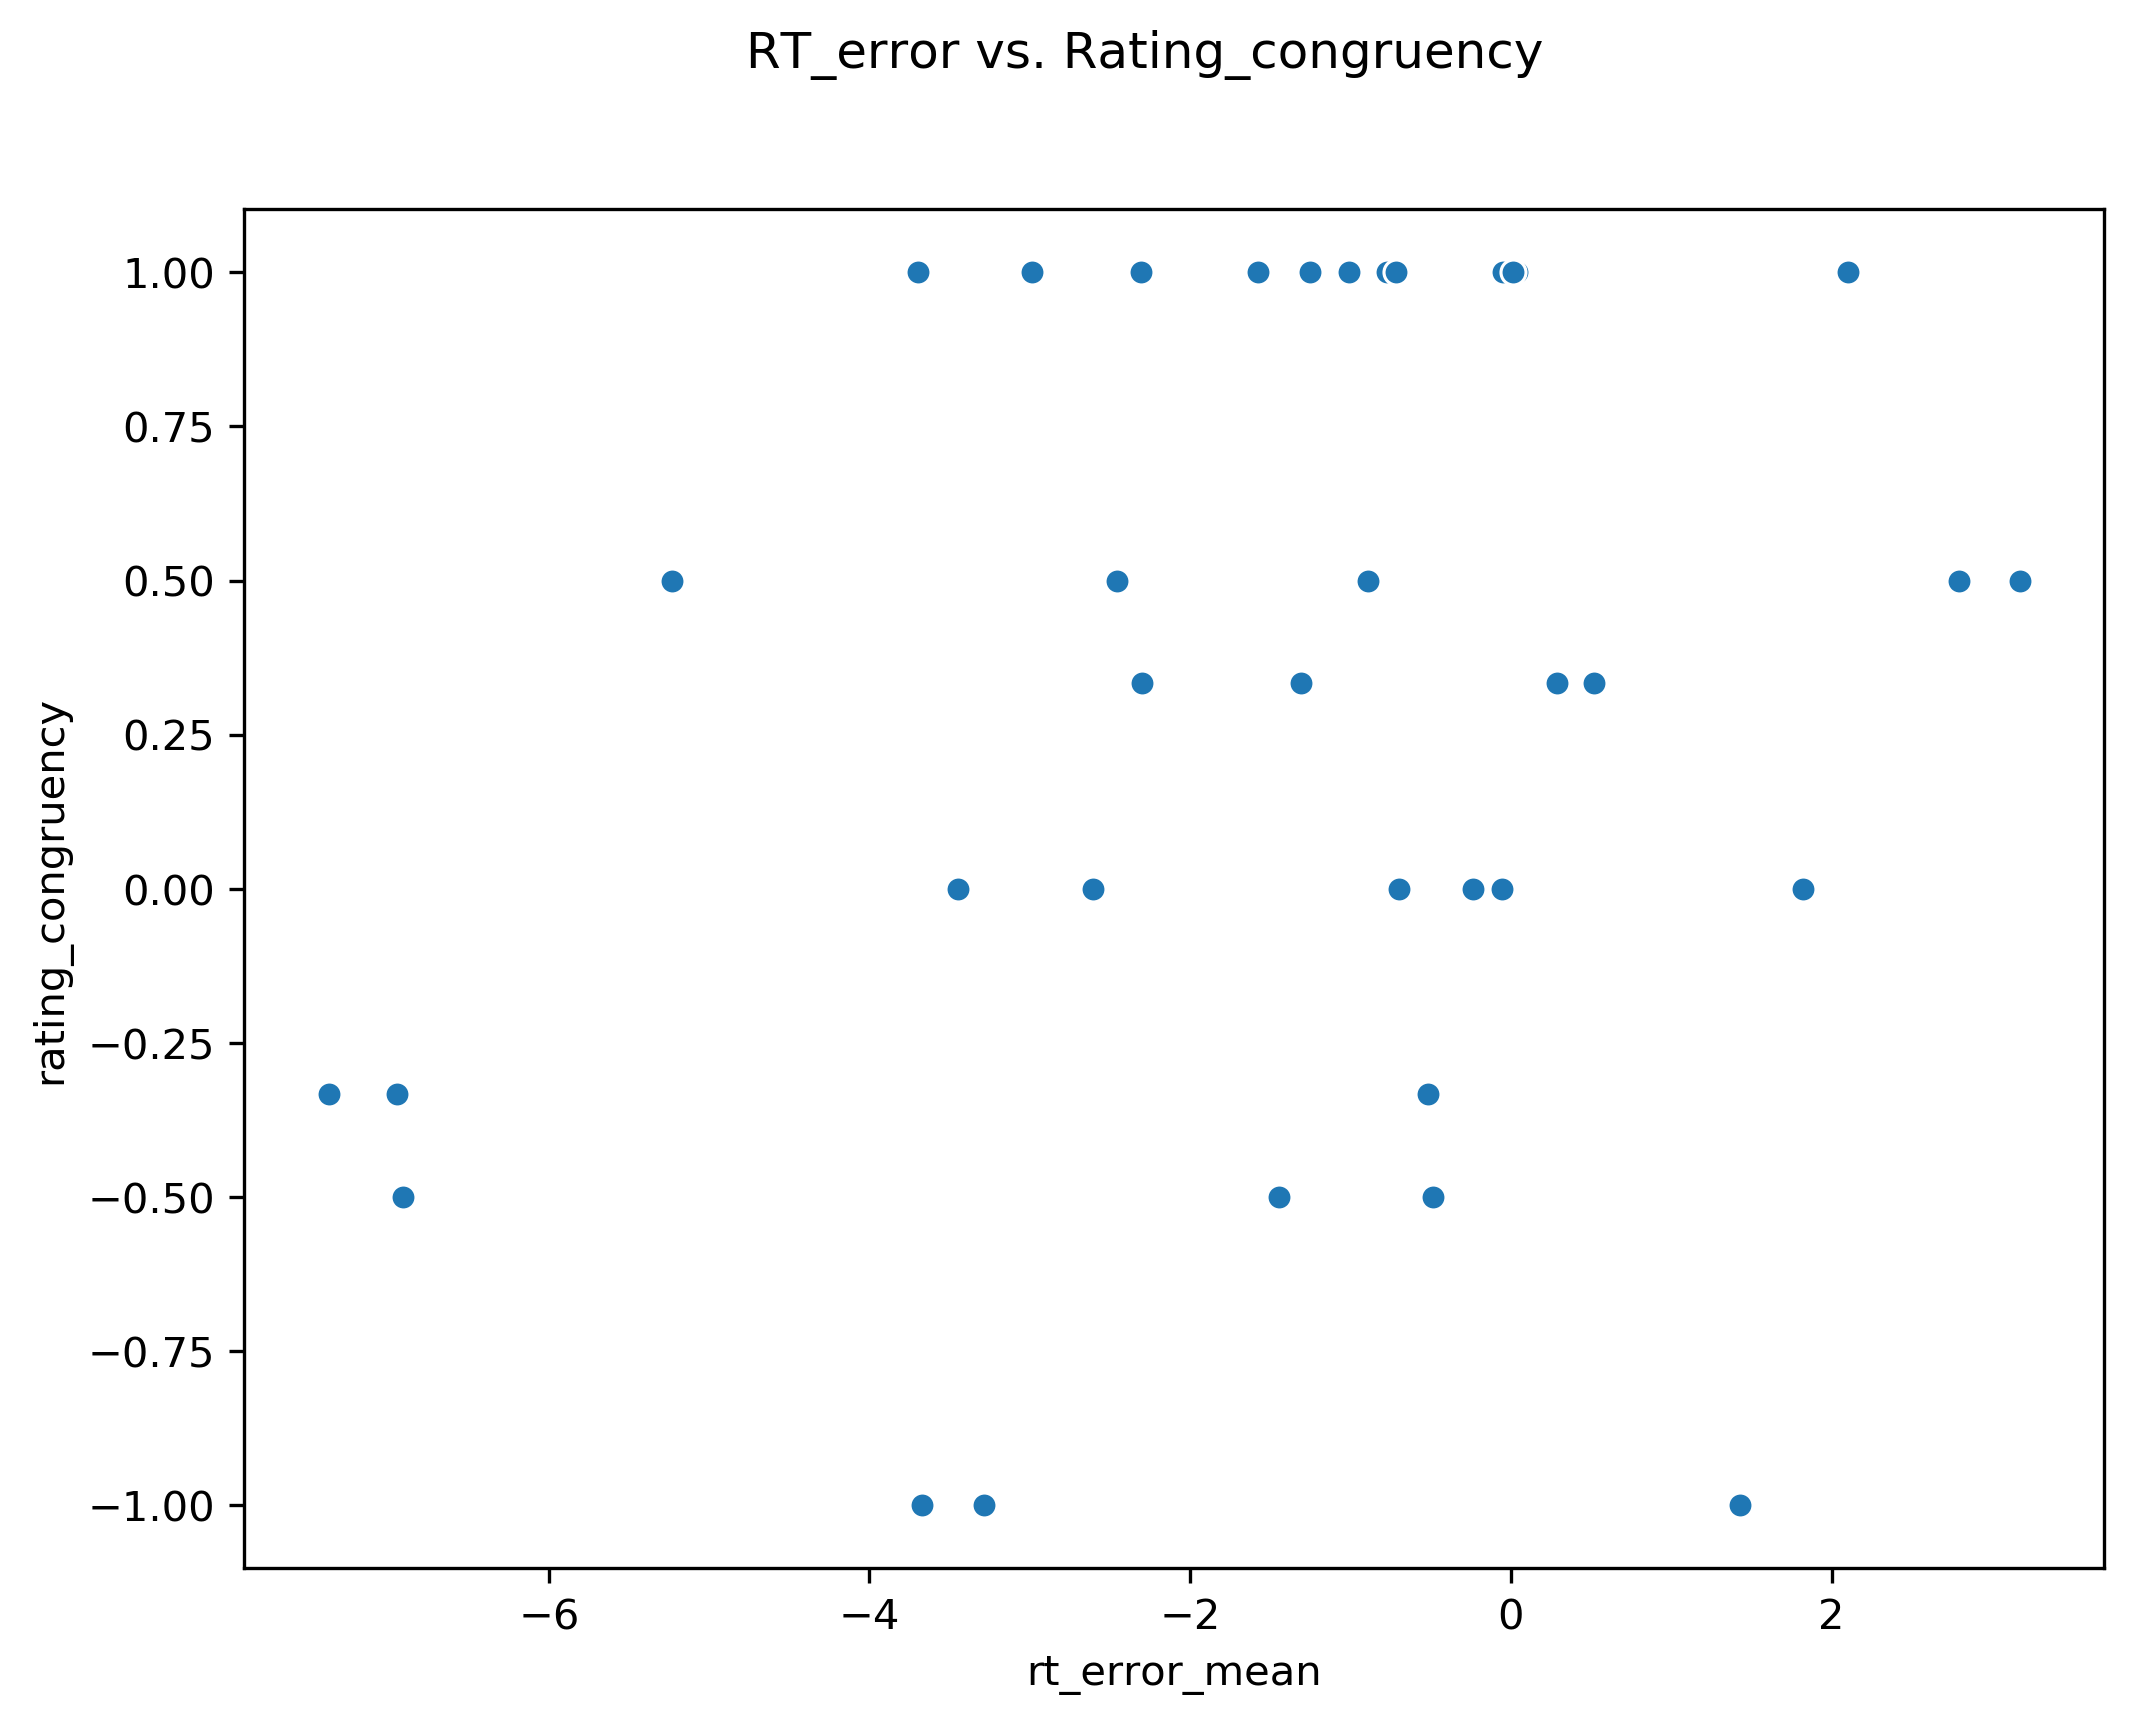

In [27]:
#Pearson's correlation
r,p = stats.pearsonr(df.loc[:,'rt_error_mean'], df.loc[:, 'rating_congruency'])
rVal = 'r = ' + str(r)
pVal = 'p = ' + str(p)
print('')
print('Pearson\'s Correlation: RT_error vs. Rating_congruency')
print(rVal)
print(pVal)

fig = plt.figure(figsize=[8, 6], dpi=300)
fig.suptitle('RT_error vs. Rating_congruency')
sns.scatterplot('rt_error_mean', 'rating_congruency', data = df)

plt.show()



Pearson's Correlation, white trials only: RT_error vs. Rating_congruency
r = 0.1180086263494409
p = 0.39539909315058047

Pearson's Correlation, white trials only: RT_error vs. Rating_congruency
r = 0.3792632466311364
p = 0.0046796337548288


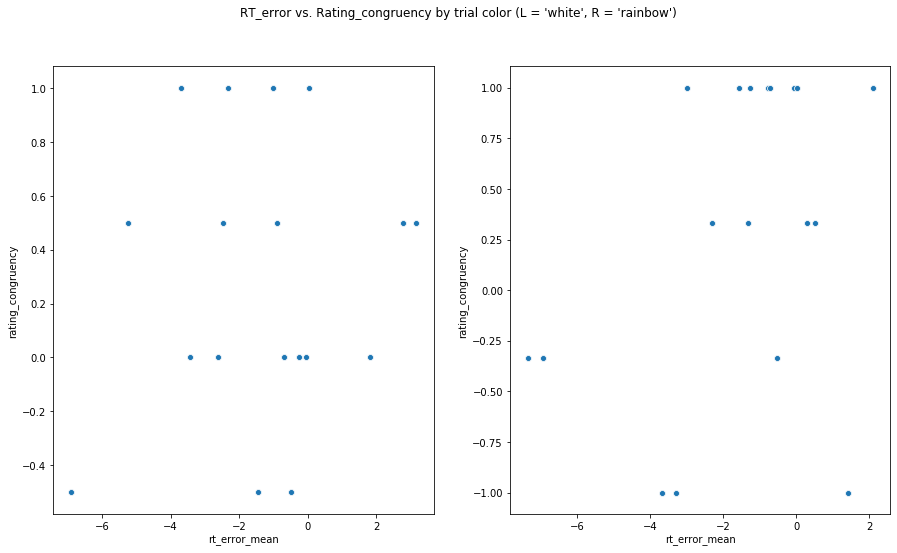

In [28]:
#RT_error_mean vs. rating_congruency for 'white' / 'rainbow' trials
#Pearson's correlation

w = df[df.trial_color == -1]
r = df[df.trial_color == 1]

#'white' trials
r1,p1 = stats.pearsonr(w.loc[:,'rt_error_mean'], w.loc[:, 'rating_congruency'])
r1Val = 'r = ' + str(r1)
p1Val = 'p = ' + str(p1)
print('')
print('Pearson\'s Correlation, white trials only: RT_error vs. Rating_congruency')
print(r1Val)
print(p1Val)

#'rainbow' trials
r2,p2 = stats.pearsonr(r.loc[:,'rt_error_mean'], r.loc[:, 'rating_congruency'])
r2Val = 'r = ' + str(r2)
p2Val = 'p = ' + str(p2)
print('')
print('Pearson\'s Correlation, white trials only: RT_error vs. Rating_congruency')
print(r2Val)
print(p2Val)

fig, axs = plt.subplots(ncols = 2, figsize = (15, 8.25))
fig.suptitle('RT_error vs. Rating_congruency by trial color (L = \'white\', R = \'rainbow\')')
sns.scatterplot('rt_error_mean', 'rating_congruency', data = w, ax = axs[0])
sns.scatterplot('rt_error_mean', 'rating_congruency', data = r, ax = axs[1])
plt.show()


Pearson's Correlation, 3" trials only: RT_error vs. Rating_congruency
r = 0.021405276079723284
p = 0.9013840651573612

Pearson's Correlation, 6" trials only: RT_error vs. Rating_congruency
r = -0.04693243003434386
p = 0.7857709298494985

Pearson's Correlation, 12" trials only: RT_error vs. Rating_congruency
r = 0.44212174335811805
p = 0.006937814722622451


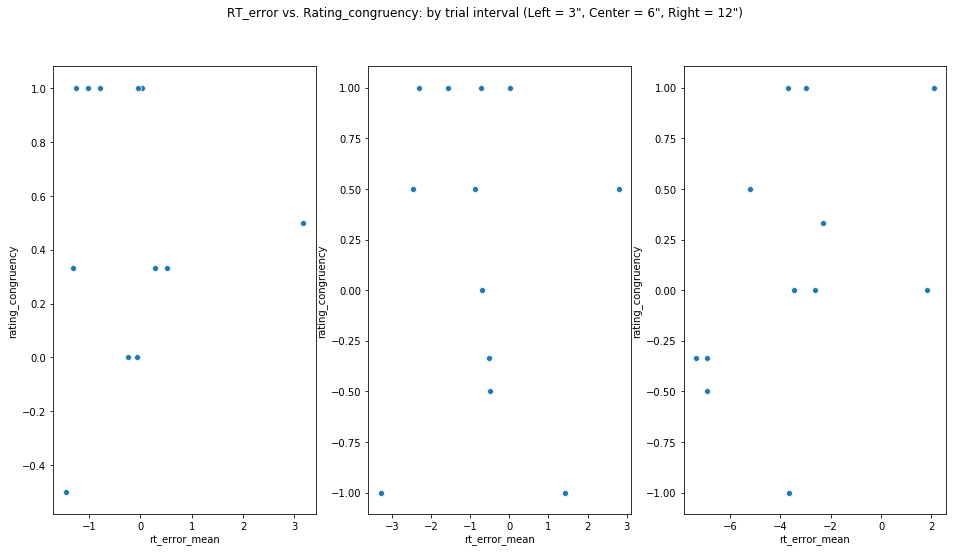

In [29]:
#RT_error_mean vs. rating_congruency for '3', '6' and '12' trials
#Pearson's correlation

three= df[df.trial_interval == 3]
six = df[df.trial_interval == 6]
twelve = df[df.trial_interval == 12]

#'3 trials
r1,p1 = stats.pearsonr(three.loc[:,'rt_error_mean'], three.loc[:, 'rating_congruency'])
r1Val = 'r = ' + str(r1)
p1Val = 'p = ' + str(p1)
print('')
print('Pearson\'s Correlation, 3\" trials only: RT_error vs. Rating_congruency')
print(r1Val)
print(p1Val)

#'6' trials
r2,p2 = stats.pearsonr(six.loc[:,'rt_error_mean'], six.loc[:, 'rating_congruency'])
r2Val = 'r = ' + str(r2)
p2Val = 'p = ' + str(p2)
print('')
print('Pearson\'s Correlation, 6\" trials only: RT_error vs. Rating_congruency')
print(r2Val)
print(p2Val)

#'12' trials
r3,p3 = stats.pearsonr(twelve.loc[:,'rt_error_mean'], twelve.loc[:, 'rating_congruency'])
r3Val = 'r = ' + str(r3)
p3Val = 'p = ' + str(p3)
print('')
print('Pearson\'s Correlation, 12\" trials only: RT_error vs. Rating_congruency')
print(r3Val)
print(p3Val)


fig, axs = plt.subplots(ncols = 3, figsize = (16, 8.25))
fig.suptitle('RT_error vs. Rating_congruency: by trial interval (Left = 3\", Center = 6\", Right = 12\")')
sns.scatterplot('rt_error_mean', 'rating_congruency', data = three, ax = axs[0])
sns.scatterplot('rt_error_mean', 'rating_congruency', data = six, ax = axs[1])
sns.scatterplot('rt_error_mean', 'rating_congruency', data = twelve, ax = axs[2])
plt.show()

<h2> Color_error vs. RT_error </h2>

(i.e. is there a relationship between how well the interval is timed and how accurate the color selection is)

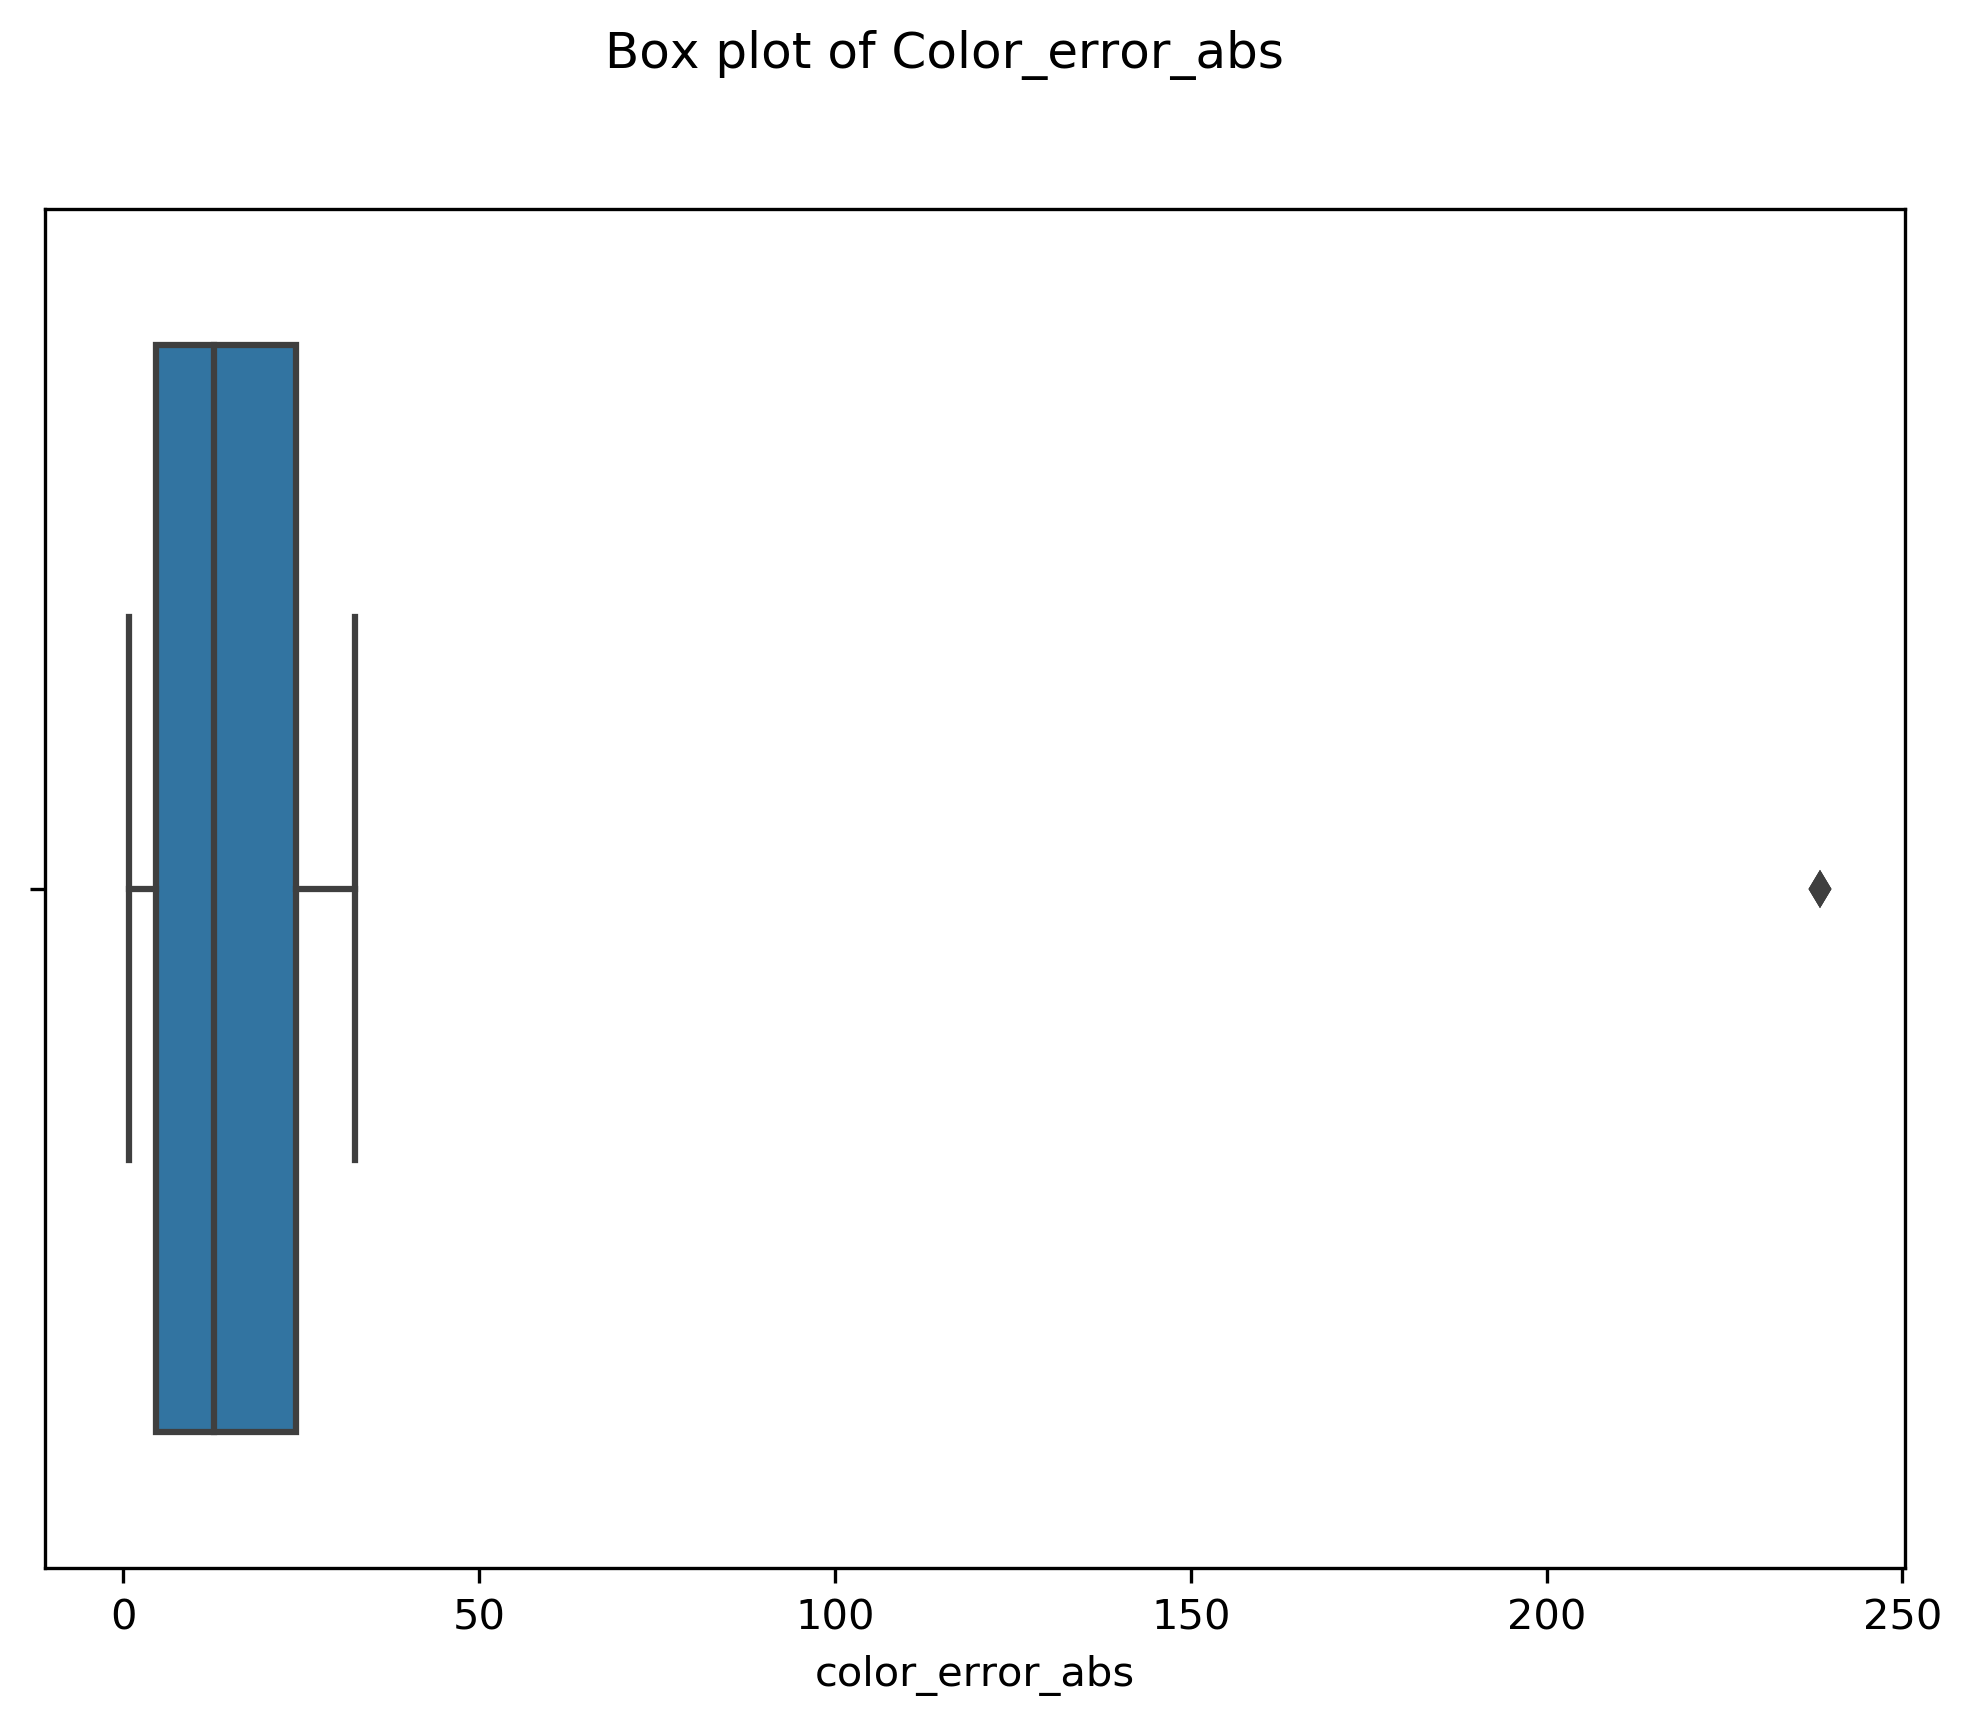


Pearson's Correlation: RT_error vs. Color_error_abs: outlier included in stats
r = 0.3485874284857293
p = 0.009788074073907992


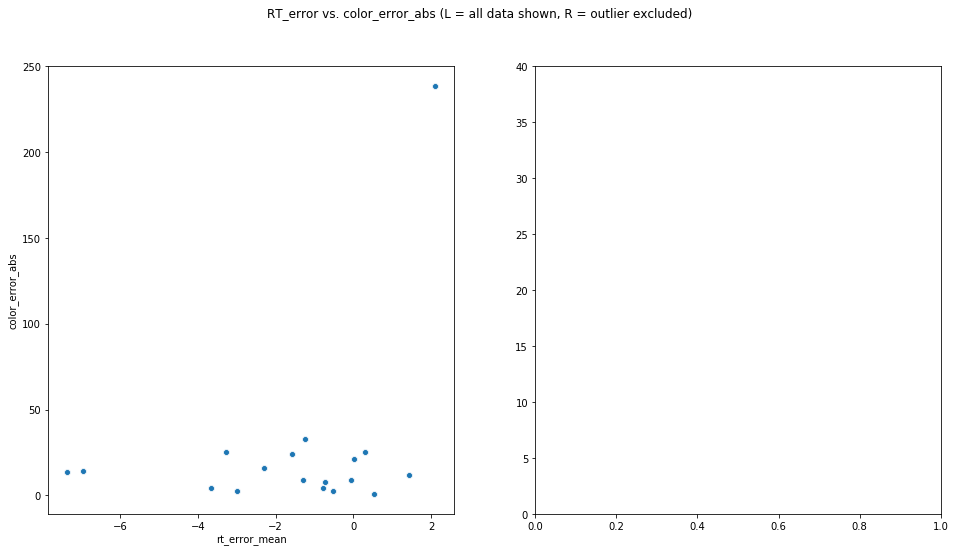

In [99]:
#Pearson's correlation
ra = df[df.trial_color == 1].copy()

fig = plt.figure(figsize=[8, 6], dpi=300)
fig.suptitle('Box plot of Color_error_abs')
sns.boxplot(x=ra['color_error_abs'])
plt.show()

r,p = stats.pearsonr(ra.loc[:,'rt_error_mean'], ra.loc[:, 'color_error_abs'])
rVal = 'r = ' + str(r)
pVal = 'p = ' + str(p)
print('')
print('Pearson\'s Correlation: RT_error vs. Color_error_abs: outlier included in stats')
print(rVal)
print(pVal)

fig, axs = plt.subplots(ncols = 2, figsize = (16, 8.25))
axs[1].set_ylim(0, 40)
fig.suptitle('RT_error vs. color_error_abs (L = all data shown, R = outlier excluded)')
sns.scatterplot('rt_error_mean', 'color_error_abs', data = ra, ax = axs[0])
#sns.scatterplot('rt_error_mean', 'color_error_abs', data = ra, ax = axs[1])

plt.show()

In [97]:
#try to get rid of outlier

m_idx = np.argmax(df.color_error_abs, axis = 0)
m = np.amax(df.color_error_abs, axis = 0)

#used np.argmax/amax to find rows with the 200 value, keep only segments around those rows
df_top = df.iloc[0:17, :] #good, no outliers ****

df_exclude = df.iloc[17,:] #should have the outlier

df_bottom = df.iloc[18:108,:] #still had a 200 value at row 41
m3 = np.argmax(df_bottom.color_error_abs, axis = 0)

df_mid = df_bottom.iloc[0:41,:] #good, no outlier ***

df_bottom2 = df_bottom.iloc[42:108, :] #need to get second half of df_bottom
m5 = np.argmax(df_bottom2.color_error_abs, axis = 0) #has outlier @ 29

df_bottom_up = df_bottom2.iloc[0:29,:] #good, no outlier
m6 = np.amax(df_bottom_up.color_error_abs, axis = 0)

df_bottom_down = df_bottom2.iloc[30:108, :] #get second half of df_bottom2
m7 = np.amax(df_bottom_down.color_error_abs, axis =0) #good! no outlier


#concatenate rows without error value
excluded = [df_top, df_mid, df_bottom_up, df_bottom_down]
df_new = pandas.concat(excluded)
m_new = np.amax(df_new.color_error_abs, axis = 0)


#df_new does NOT have outliers

32.594033333333336


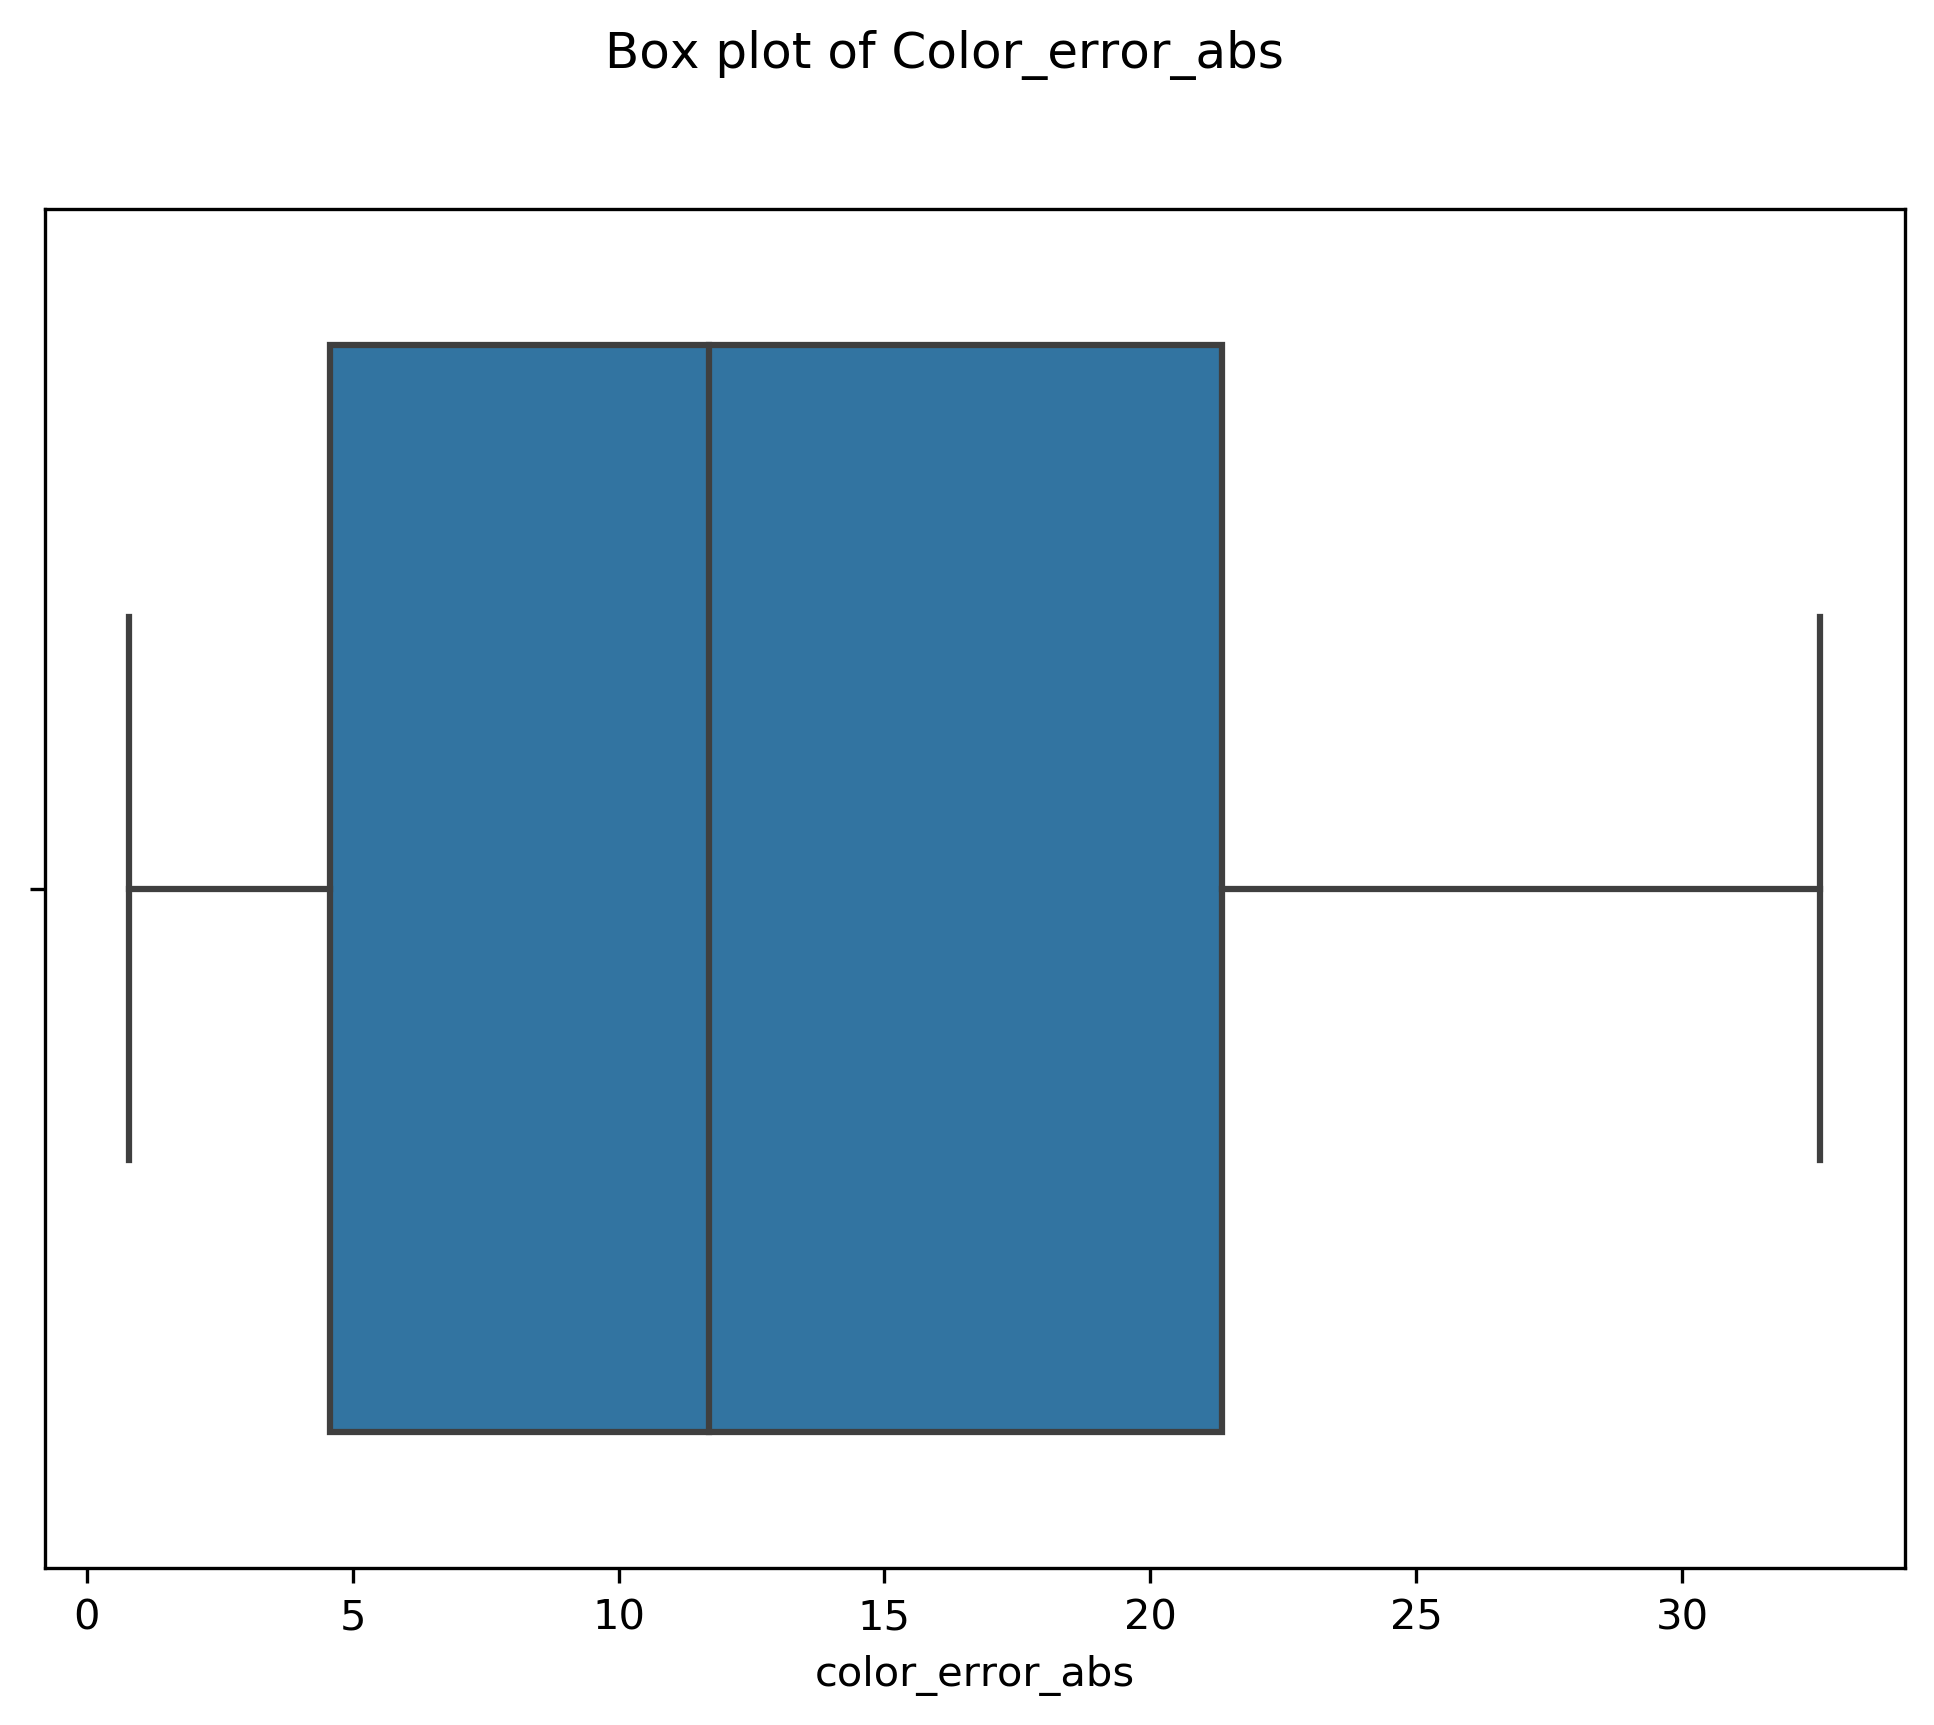


Pearson's Correlation: RT_error vs. Color_error_abs: outlier included in stats
r = -0.04308038002985017
p = 0.7640492518449757


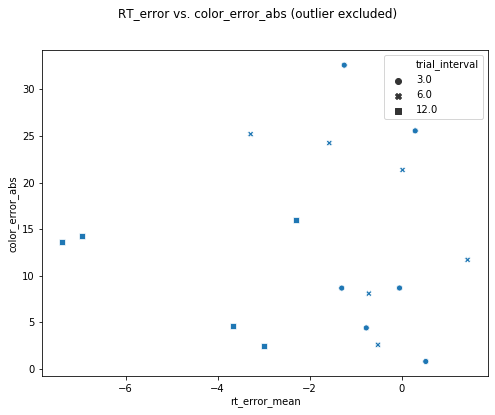

In [105]:
#Pearson's correlation
ra = df_new[df_new.trial_color == 1].copy()

fig = plt.figure(figsize=[8, 6], dpi=300)
fig.suptitle('Box plot of Color_error_abs')
sns.boxplot(x=ra['color_error_abs'])
plt.show()

r,p = stats.pearsonr(ra.loc[:,'rt_error_mean'], ra.loc[:, 'color_error_abs'])
rVal = 'r = ' + str(r)
pVal = 'p = ' + str(p)
print('')
print('Pearson\'s Correlation: RT_error vs. Color_error_abs: outlier included in stats')
print(rVal)
print(pVal)

fig, axs = plt.subplots(ncols = 1, figsize = (8, 6))
#axs[0].set_ylim(0, 40)
fig.suptitle('RT_error vs. color_error_abs (outlier excluded)')
sns.scatterplot('rt_error_mean', 'color_error_abs', data = ra, style = 'trial_interval')
#sns.scatterplot('rt_error_mean', 'color_error_abs', data = ra, ax = axs[1])

plt.show()